<a href="https://colab.research.google.com/github/TGandhi5473/APANProjects/blob/main/Healthcare_FE_2_Tgandhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 -- Feature Engineering

## Objectives
It is important in any data science project to define the objective as specific as possible. Below let's write it from general to specific. This will direct your analysis.
* Detect any hospital that may abuse the resources.
* Detect any hospital that may abuse the resources compared to its peers.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and State.

## FE:
* We will focus on the "Average Medicare Payments", which is the "Medicare Payment Amount / Total Discharges" to create features.


## Table of Contents
* [Section 1: data preparation](#Section_1)
    * [Section 1.1: Load data](#Section_11)
    * [Section 1.2: data preparation](#Section_12)
* [Section 2: EDA](#Section_2)
    * [Section 2.1: Distribution plots](#Section_21)
    * [Section 2.2: Count by state(#Sect](#Section_22)    
    * [Section 2.3: Count of top cities](#Section_23)
* [Section 3: Feature engineering](#Section_3)
    * [Section 3.1: Create the benchmark table - State & DRG average](#Section_31)
    * [Section 3.2: Create features](#Section_32)    

In [2]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#pd.options.display.float_format = '{:.2f}'.format

## Section 1: Data preparation <a class="anchor" id="Section_1"></a>
### Section 1.1: Load Data <a class="anchor" id="Section_11"></a>
* Import packages and data
* Rename column
* Change data type and transfer spending amount with dollar sign into numeric
* Understand the data strcuture.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv('inpatientCharges.csv')

In [5]:
#path = ''
#data = pd.read_csv(path + '/inpatientCharges.csv')

In [6]:
#data.describe()
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [7]:
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)

In [8]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [9]:
# Distribution plots of average total payments
data['Average_Total_Payments'].describe()

,Average_Total_Payments
count,163065
unique,147842
top,$4370.00
freq,9


In [10]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '', regex=True).astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '', regex=True).astype(float))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## Section 2: EDA <a class="anchor" id="Section_2"></a>
### Section 2.1: Distribution plots <a class="anchor" id="Section_21"></a>

In [12]:
# Distribution plots of average total payments
data['Average_Total_Payments'].describe()

,Average_Total_Payments
count,163065.000000
mean,9707.473804
std,7664.642598
min,2673.000000
25%,5234.500000
50%,7214.100000
75%,11286.400000
max,156158.180000


<Axes: xlabel='Average_Total_Payments', ylabel='Count'>

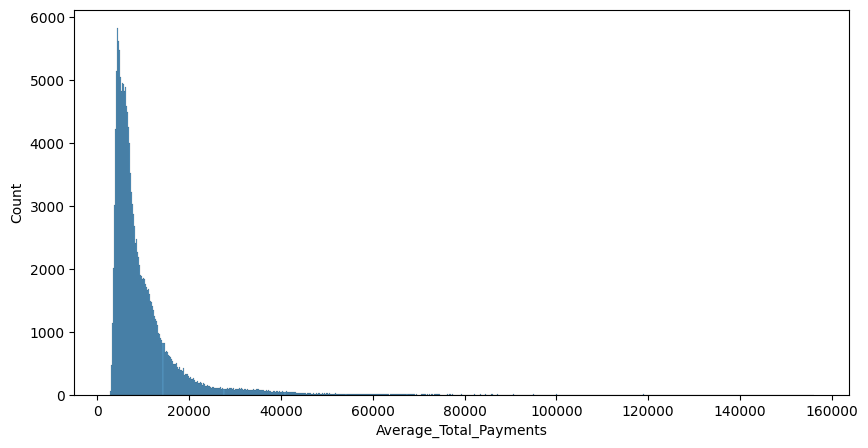

In [13]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(data['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])

* One plot is enough. The following plot can be omitted.

<Axes: xlabel='Average_Total_Payments'>

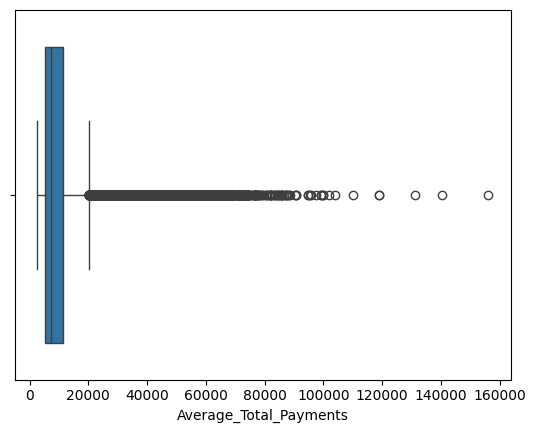

In [14]:
sns.boxplot(x = 'Average_Total_Payments', data = data)

* From those 2 plots we can see 75% of the charges are under 10,000 dollar, but the highest charge amounts to 156,158

### Section 2.2: Count by State <a class="anchor" id="Section_22"></a>

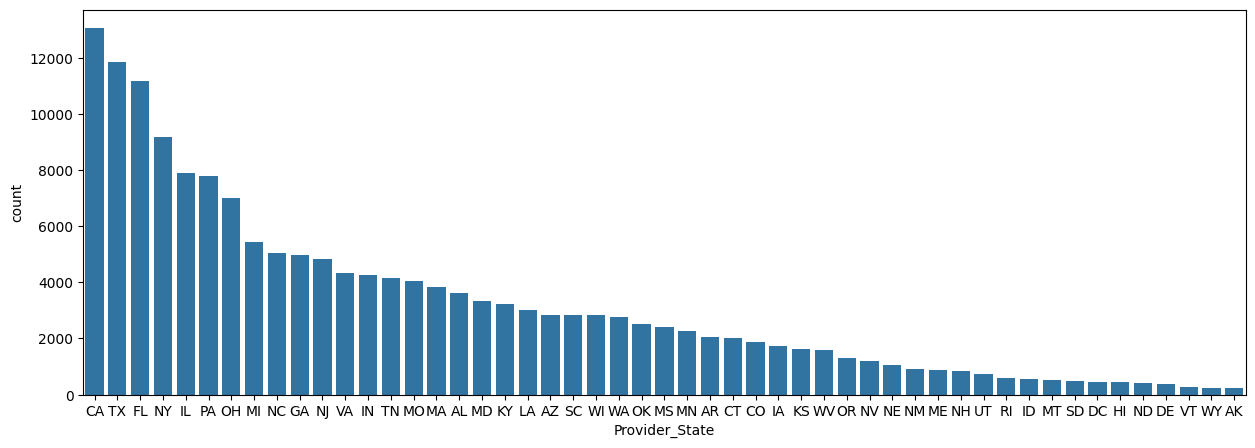

In [15]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
#plt.xticks(rotation = 90)
#ax = plt.gca()
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
#            fontsize=12, color='blue', ha='center', va='bottom')
plt.rcParams["axes.labelsize"] = 20

* From this histogram, California, Texas, and Florid has the highest number of hospital divisions.

### Section 2.3: Count of top 20 cities <a class="anchor" id="Section_23"></a>

In [16]:
data['Provider_Name'].value_counts()

,count
Provider_Name,
GOOD SAMARITAN HOSPITAL,633
ST JOSEPH MEDICAL CENTER,427
MERCY MEDICAL CENTER,357
MERCY HOSPITAL,347
ST JOSEPH HOSPITAL,343
...,...
SURGICAL HOSPITAL OF OKLAHOMA,1
KNOX COUNTY HOSPITAL,1
KAISER FOUNDATION HOSPITAL - WOODLAND HILLS,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'CHICAGO'),
  Text(1, 0, 'BALTIMORE'),
  Text(2, 0, 'HOUSTON'),
  Text(3, 0, 'PHILADELPHIA'),
  Text(4, 0, 'BROOKLYN'),
  Text(5, 0, 'SPRINGFIELD'),
  Text(6, 0, 'COLUMBUS'),
  Text(7, 0, 'LOS ANGELES'),
  Text(8, 0, 'NEW YORK'),
  Text(9, 0, 'DALLAS'),
  Text(10, 0, 'LAS VEGAS'),
  Text(11, 0, 'JACKSON'),
  Text(12, 0, 'JACKSONVILLE'),
  Text(13, 0, 'COLUMBIA'),
  Text(14, 0, 'WASHINGTON'),
  Text(15, 0, 'CINCINNATI'),
  Text(16, 0, 'MIAMI'),
  Text(17, 0, 'CLEVELAND'),
  Text(18, 0, 'BOSTON'),
  Text(19, 0, 'INDIANAPOLIS')])

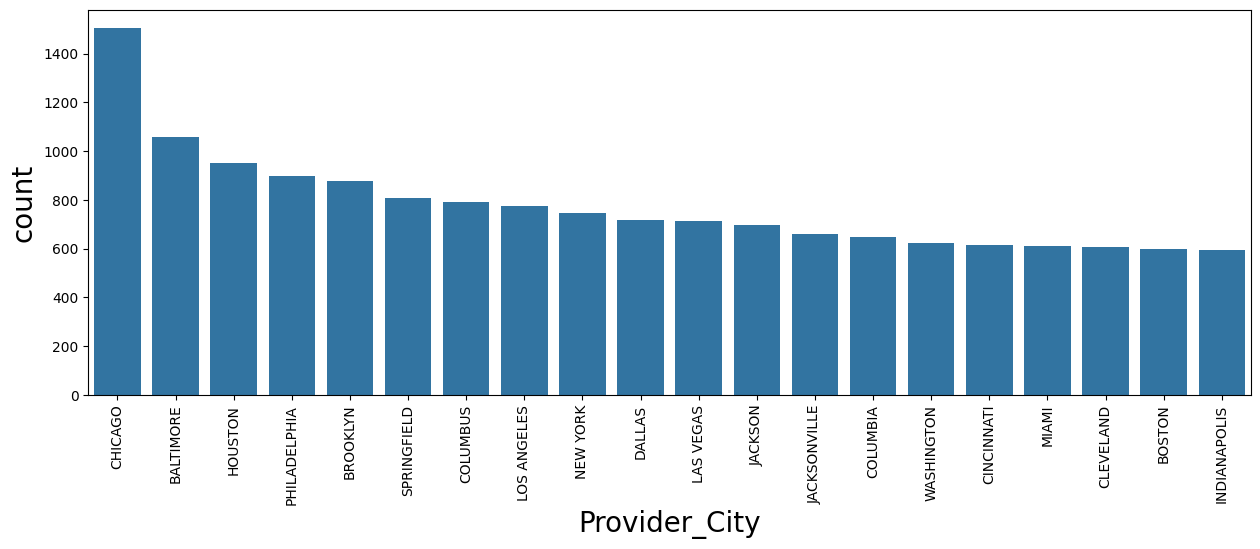

In [17]:
plt.figure(figsize=(15,5))
ch = sns.countplot(x='Provider_City',data=data,order=data['Provider_City'].value_counts()[:20].index)
plt.xticks(rotation = 90)
# junk = ch.set_xticklabels(ch.get_xticklabels()) # Use this line to collect the text prints

#ax = plt.gca()
#plt.rcParams["axes.labelsize"] = 20


# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=5)

# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
#             fontsize=12, color='blue', ha='center', va='bottom')
# plt.rcParams["axes.labelsize"] = 20

* The above text are from matplotlib.
* We really do not want to print the text.
* You can assign them to "_" to throw them away.

/tmp/ipython-input-18-3388184233.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


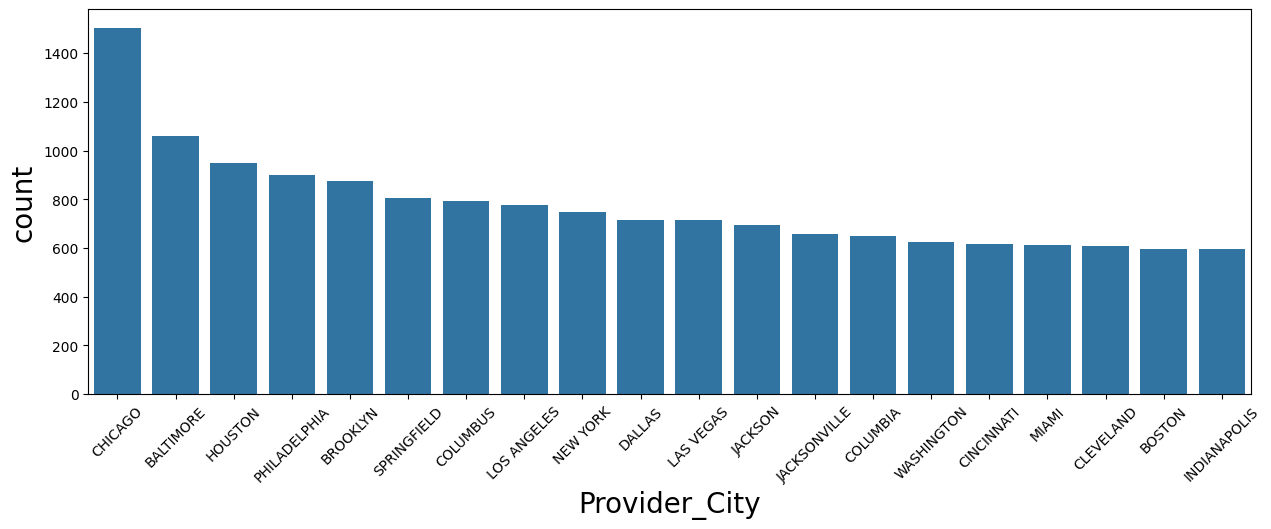

In [18]:
# This will look better
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

#### Class discussion/Thought process:
- The following shows the average medicare payment by DRG. Does it make sense to compare "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" with "885 - PSYCHOSES"?

In [19]:
data.groupby('DRG')['Average_Total_Payments'].describe().reset_index()

/tmp/ipython-input-19-2173581415.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('DRG')['Average_Total_Payments'].describe().reset_index()


,DRG,count,mean,std,min,25%,50%,75%,max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.0,6960.534004,1477.873952,4968.00,6001.8300,6582.890,7516.825,18420.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201.0,6706.276445,2033.965862,4194.09,5412.8700,6093.750,7345.360,25519.43
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659.0,13263.823032,3847.918207,8174.28,10762.2200,12084.700,14424.325,50882.40
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269.0,7922.671141,2084.658336,5368.73,6626.2700,7280.050,8503.060,26510.15
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806.0,5713.985221,1342.538675,3916.41,4819.3250,5326.025,6197.480,14744.05
...,...,...,...,...,...,...,...,...,...
95,885 - PSYCHOSES,613.0,6968.721876,2440.280958,4444.90,5477.2400,6155.560,7841.280,32200.77
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906.0,4949.907307,1462.463278,3172.44,3969.9675,4529.535,5440.675,18630.92
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843.0,10763.814413,2823.004637,6942.83,8851.4550,10062.280,11788.675,33251.14
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382.0,4485.378734,1154.328951,3040.72,3720.5725,4136.105,4879.390,12479.80


## Section 3: Feature Engineering <a class="anchor" id="Section_3"></a>


#### Discussions:
* Think of the objective: "Detect any hospital that may abuse the resources compared to the average of its peers of the same DRG and State."
* A feature should be able to "detect any hospital...". The above table does not have hospitals.
* The above table is the benchmark. Are they features?

### Section 3.1: Create the benchmark table - State & DRG average <a class="anchor" id="Section_31"></a>

In [20]:
benchmark = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
benchmark.head()

/tmp/ipython-input-20-1827863010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  benchmark = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()


,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


#### Discussions:
- There is no label to train a supervised model. What are the unsupervised techniques that you can think of?
- How do we validate an unsupervised model outcome?
- What will happen if you have a bad feature in an unsupervised model?

#3.2 Feature 1&2, Payment/Benchmark Difference & Ratio

We compare the aggregated values calculated back in 3.1 to the actual for that particular hospital DSG combination and have differences/ratio's for them. I proceeded to normalize them to account so comparisons between states is more fair.

In [21]:
# Merge the benchmark with the original data
data_with_benchmark = pd.merge(data, benchmark, on=['Provider_State', 'DRG'], how='left')

# Create features: difference and ratio of a hospital's payment compared to the benchmark
data_with_benchmark['Payment_vs_Benchmark_Diff'] = data_with_benchmark['Average_Total_Payments'] - data_with_benchmark['Avg_Payment_ByStateDRG']
data_with_benchmark['Payment_vs_Benchmark_Ratio'] = data_with_benchmark['Average_Total_Payments'] / data_with_benchmark['Avg_Payment_ByStateDRG']

# Display the first few rows with the new features
display(data_with_benchmark.head())

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,Payment_vs_Benchmark_Diff,Payment_vs_Benchmark_Ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,33.628261,1.005855
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,43.958261,1.007653
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5743.611739,-308.661739,0.946260
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5743.611739,-326.051739,0.943232
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5743.611739,-85.281739,0.985152


In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the features to normalize
features_to_normalize = ['Payment_vs_Benchmark_Diff', 'Payment_vs_Benchmark_Ratio']

# Apply StandardScaler to the selected features
data_with_benchmark[features_to_normalize] = scaler.fit_transform(data_with_benchmark[features_to_normalize])

# Display the first few rows with the normalized features
display(data_with_benchmark.head())

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,Payment_vs_Benchmark_Diff,Payment_vs_Benchmark_Ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73,5743.611739,0.012932,0.029983
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71,5743.611739,0.016905,0.039193
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79,5743.611739,-0.118700,-0.275205
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16,5743.611739,-0.125387,-0.290710
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44,5743.611739,-0.032796,-0.076038


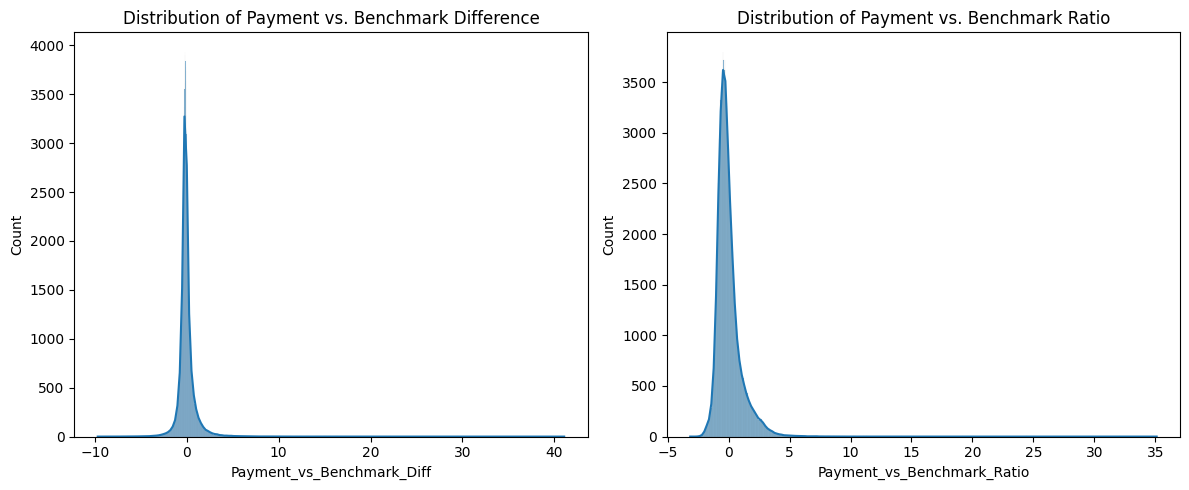

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(data_with_benchmark['Payment_vs_Benchmark_Diff'], kde=True)
plt.title('Distribution of Payment vs. Benchmark Difference')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(data_with_benchmark['Payment_vs_Benchmark_Ratio'], kde=True)
plt.title('Distribution of Payment vs. Benchmark Ratio')

plt.tight_layout()
plt.show()

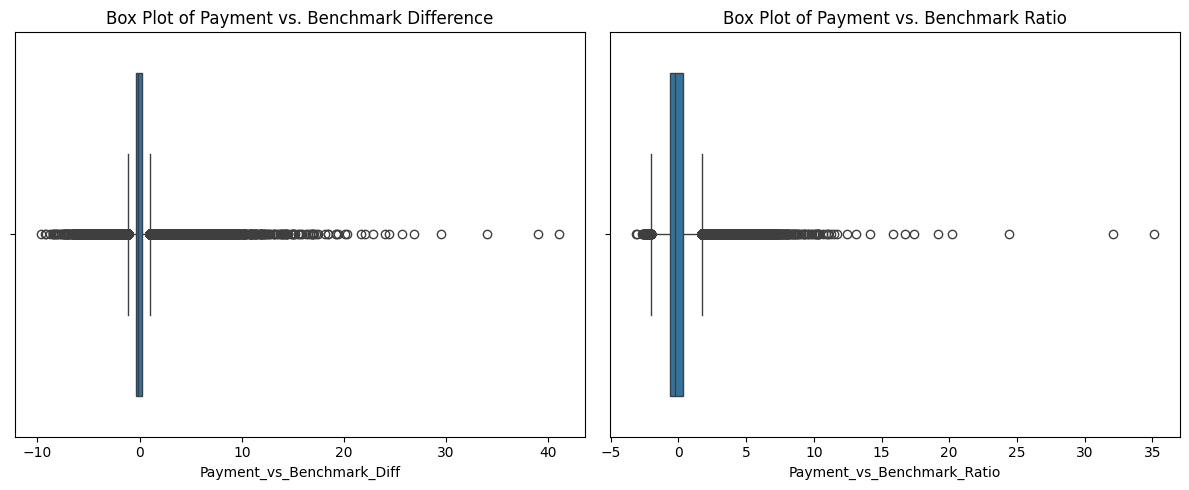

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.boxplot(x=data_with_benchmark['Payment_vs_Benchmark_Diff'])
plt.title('Box Plot of Payment vs. Benchmark Difference')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.boxplot(x=data_with_benchmark['Payment_vs_Benchmark_Ratio'])
plt.title('Box Plot of Payment vs. Benchmark Ratio')

plt.tight_layout()
plt.show()

### Feature 3: Total Discharges per DRG per Hospital

This feature directly captures the volume of cases for a specific DRG at each hospital, which can influence cost structures and potentially highlight hospitals with unusually high or low activity for certain procedures.

In [25]:
# Calculate the benchmark: average total discharges per DRG across all data
drg_discharge_benchmark = data_with_benchmark.groupby('DRG')['Total_Discharges'].mean().reset_index()
drg_discharge_benchmark.columns = ['DRG', 'Avg_Discharges_ByDRG']

# Merge this benchmark with the main data
data_with_benchmark = pd.merge(data_with_benchmark, drg_discharge_benchmark, on='DRG', how='left')

# Create features: difference and ratio of a hospital's total discharges compared to the DRG benchmark
data_with_benchmark['Discharges_vs_DRG_Diff'] = data_with_benchmark['Total_Discharges'] - data_with_benchmark['Avg_Discharges_ByDRG']
data_with_benchmark['Discharges_vs_DRG_Ratio'] = data_with_benchmark['Total_Discharges'] / data_with_benchmark['Avg_Discharges_ByDRG']

# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_normalize_discharges = ['Discharges_vs_DRG_Diff', 'Discharges_vs_DRG_Ratio']
data_with_benchmark[features_to_normalize_discharges] = scaler.fit_transform(data_with_benchmark[features_to_normalize_discharges])

# Display the first few rows with the new features
display(data_with_benchmark[['Provider_Name', 'DRG', 'Total_Discharges', 'Avg_Discharges_ByDRG', 'Discharges_vs_DRG_Diff', 'Discharges_vs_DRG_Ratio']].head())

/tmp/ipython-input-25-1060003898.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drg_discharge_benchmark = data_with_benchmark.groupby('DRG')['Total_Discharges'].mean().reset_index()


,Provider_Name,DRG,Total_Discharges,Avg_Discharges_ByDRG,Discharges_vs_DRG_Diff,Discharges_vs_DRG_Ratio
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,91,31.145505,1.339102,2.528412
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,14,31.145505,-0.383590,-0.724271
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,24,31.145505,-0.159864,-0.301845
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,25,31.145505,-0.137491,-0.259602
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,18,31.145505,-0.294099,-0.555301


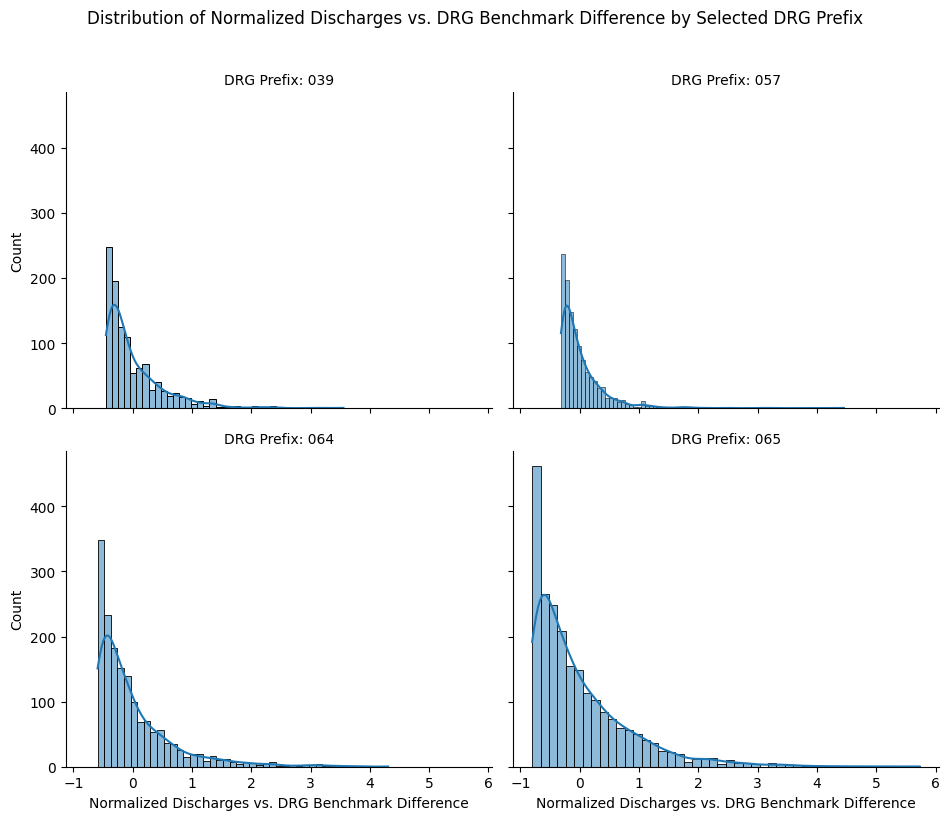

In [26]:
# Define the list of DRG prefixes to filter by
drg_prefixes = ['039', '057', '064', '065']

# Filter the DataFrame to include only the selected DRGs
filtered_data = data_with_benchmark[data_with_benchmark['DRG'].str.startswith(tuple(drg_prefixes))].copy() # Use .copy() to avoid SettingWithCopyWarning

# Extract the DRG prefix into a new column for grouping
filtered_data['DRG_Prefix'] = filtered_data['DRG'].str[:3]

# Create a grid of histograms, one for each selected DRG prefix
g = sns.FacetGrid(filtered_data, col='DRG_Prefix', col_wrap=2, height=4, aspect=1.2)
g.map(sns.histplot, 'Discharges_vs_DRG_Diff', kde=True)
g.fig.suptitle('Distribution of Normalized Discharges vs. DRG Benchmark Difference by Selected DRG Prefix', y=1.02) # Add a title to the figure
g.set_axis_labels('Normalized Discharges vs. DRG Benchmark Difference', 'Count')
g.set_titles('DRG Prefix: {col_name}')
plt.tight_layout()
plt.show()

Most DRG cases follow the same distribution but there are always outliers regardless of procedures so few hospitals need follow ups. More data is also a possibility because some hospitals might be well known for certain types of care. Hospitals that fall under Fraud, Waste, or Abuse require more features than just this to qualify as fraud.

### Feature 4: Average Medicare Payment per Discharge

This feature represents the average amount Medicare paid to a hospital for each patient within a specific DRG, providing a direct measure of Medicare's cost per case at that institution.

In [27]:
# Calculate the benchmark: average Average Medicare Payment per DRG across all data
drg_medicare_payment_benchmark = data_with_benchmark.groupby('DRG')['Average_Medicare_Payment'].mean().reset_index()
drg_medicare_payment_benchmark.columns = ['DRG', 'Avg_Medicare_Payment_ByDRG']

# Before merging, clean up any potentially existing columns from previous attempts
columns_to_drop = [col for col in data_with_benchmark.columns if 'Avg_Medicare_Payment_ByDRG' in col]
if columns_to_drop:
    data_with_benchmark = data_with_benchmark.drop(columns=columns_to_drop)


# Merge this benchmark with the main data
data_with_benchmark = pd.merge(data_with_benchmark, drg_medicare_payment_benchmark, on='DRG', how='left')

# Create features: difference and ratio of a hospital's average Medicare payment compared to the DRG benchmark
data_with_benchmark['Medicare_Payment_vs_DRG_Diff'] = data_with_benchmark['Average_Medicare_Payment'] - data_with_benchmark['Avg_Medicare_Payment_ByDRG']
data_with_benchmark['Medicare_Payment_vs_DRG_Ratio'] = data_with_benchmark['Average_Medicare_Payment'] / data_with_benchmark['Avg_Medicare_Payment_ByDRG']

# Display the first few rows with the new features
display(data_with_benchmark[['Provider_Name', 'DRG', 'Average_Medicare_Payment', 'Avg_Medicare_Payment_ByDRG', 'Medicare_Payment_vs_DRG_Diff', 'Medicare_Payment_vs_DRG_Ratio']].head())

/tmp/ipython-input-27-2437853467.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  drg_medicare_payment_benchmark = data_with_benchmark.groupby('DRG')['Average_Medicare_Payment'].mean().reset_index()


,Provider_Name,DRG,Average_Medicare_Payment,Avg_Medicare_Payment_ByDRG,Medicare_Payment_vs_DRG_Diff,Medicare_Payment_vs_DRG_Ratio
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4763.73,5555.837525,-792.107525,0.857428
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4976.71,5555.837525,-579.127525,0.895762
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4453.79,5555.837525,-1102.047525,0.801642
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4129.16,5555.837525,-1426.677525,0.743211
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4851.44,5555.837525,-704.397525,0.873215


In [28]:
# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_normalize_medicare = ['Medicare_Payment_vs_DRG_Diff', 'Medicare_Payment_vs_DRG_Ratio']
data_with_benchmark[features_to_normalize_medicare] = scaler.fit_transform(data_with_benchmark[features_to_normalize_medicare])

# Display the first few rows with the normalized features
display(data_with_benchmark[['Provider_Name', 'DRG', 'Medicare_Payment_vs_DRG_Diff', 'Medicare_Payment_vs_DRG_Ratio']].head())

,Provider_Name,DRG,Medicare_Payment_vs_DRG_Diff,Medicare_Payment_vs_DRG_Ratio
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,-0.268057,-0.506699
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,-0.195983,-0.370459
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,-0.372944,-0.704963
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,-0.482803,-0.912623
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,-0.238376,-0.450592


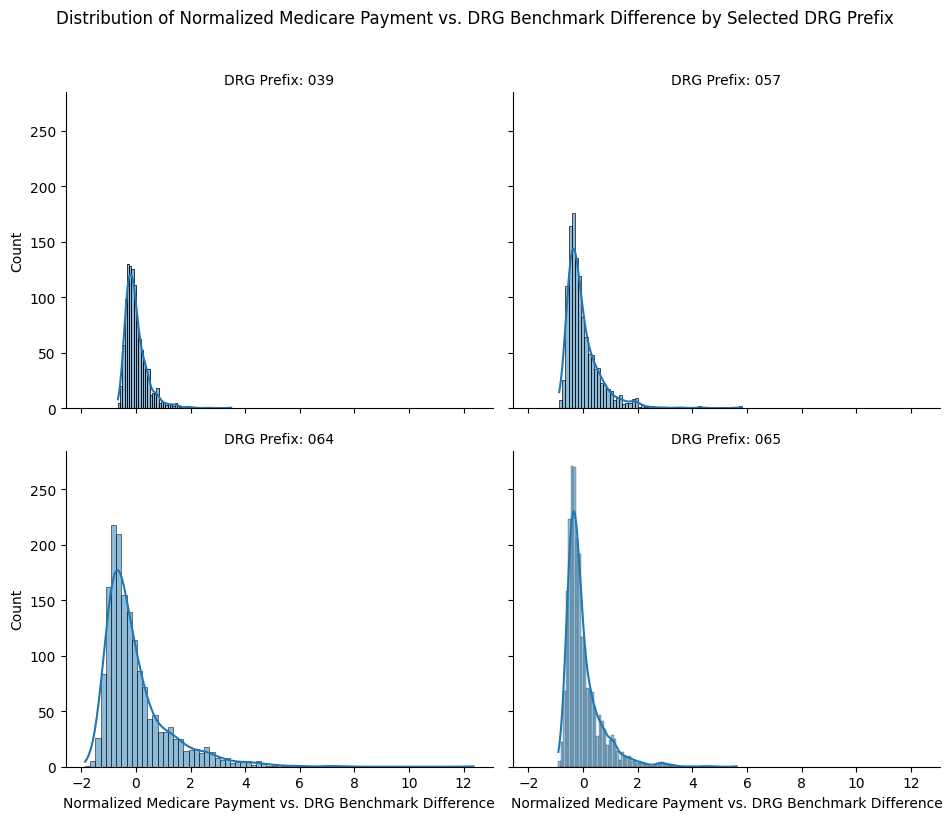

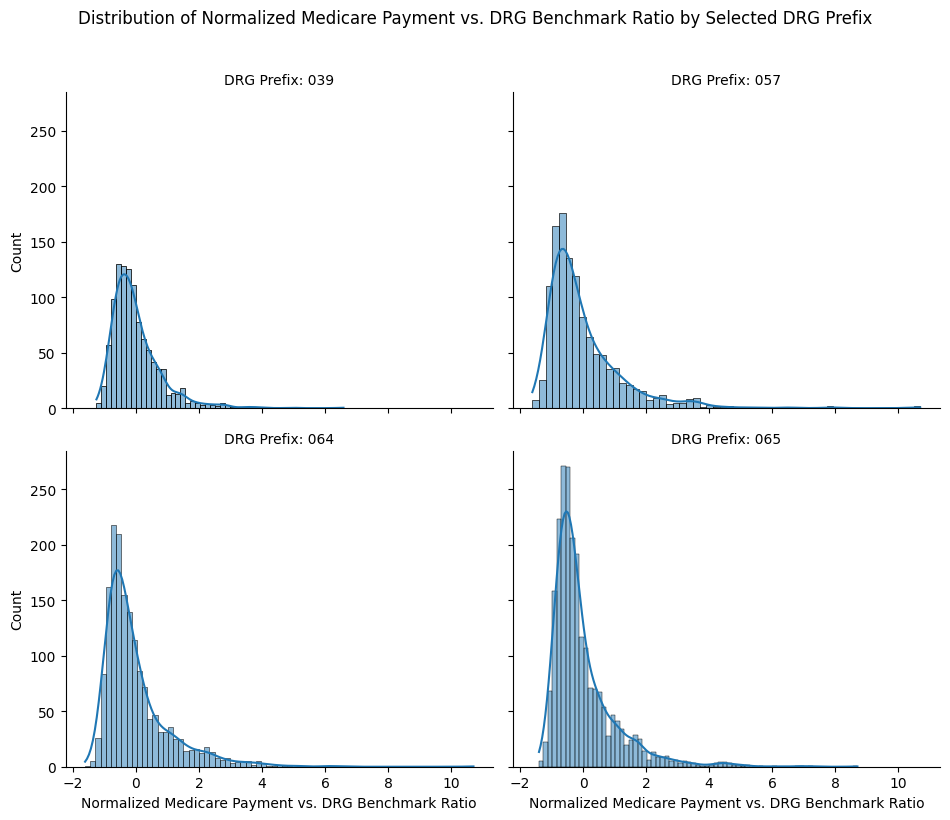

In [29]:
# Define the list of DRG prefixes to filter by
drg_prefixes = ['039', '057', '064', '065']

# Filter the DataFrame to include only the selected DRGs
# Ensure 'DRG_Prefix' column is available, create if not (though it should be from previous steps)
if 'DRG_Prefix' not in data_with_benchmark.columns:
    data_with_benchmark['DRG_Prefix'] = data_with_benchmark['DRG'].str[:3]

filtered_data_medicare = data_with_benchmark[data_with_benchmark['DRG_Prefix'].isin(drg_prefixes)].copy() # Use .copy() to avoid SettingWithCopyWarning


# Create a grid of histograms for Medicare_Payment_vs_DRG_Diff
g_diff = sns.FacetGrid(filtered_data_medicare, col='DRG_Prefix', col_wrap=2, height=4, aspect=1.2)
g_diff.map(sns.histplot, 'Medicare_Payment_vs_DRG_Diff', kde=True)
g_diff.fig.suptitle('Distribution of Normalized Medicare Payment vs. DRG Benchmark Difference by Selected DRG Prefix', y=1.02) # Add a title to the figure
g_diff.set_axis_labels('Normalized Medicare Payment vs. DRG Benchmark Difference', 'Count')
g_diff.set_titles('DRG Prefix: {col_name}')
plt.tight_layout()
plt.show()

# Create a grid of histograms for Medicare_Payment_vs_DRG_Ratio
g_ratio = sns.FacetGrid(filtered_data_medicare, col='DRG_Prefix', col_wrap=2, height=4, aspect=1.2)
g_ratio.map(sns.histplot, 'Medicare_Payment_vs_DRG_Ratio', kde=True)
g_ratio.fig.suptitle('Distribution of Normalized Medicare Payment vs. DRG Benchmark Ratio by Selected DRG Prefix', y=1.02) # Add a title to the figure
g_ratio.set_axis_labels('Normalized Medicare Payment vs. DRG Benchmark Ratio', 'Count')
g_ratio.set_titles('DRG Prefix: {col_name}')
plt.tight_layout()
plt.show()

### Feature 5: Medicare Payment vs. Total Payment Ratio

This ratio indicates the proportion of a hospital's total payment for a DRG that comes from Medicare. Deviations from the norm could suggest different payer mixes or billing practices.

In [30]:
# Calculate the ratio of Average Medicare Payment to Average Total Payments
data_with_benchmark['Medicare_vs_Total_Payment_Ratio'] = data_with_benchmark['Average_Medicare_Payment'] / data_with_benchmark['Average_Total_Payments']

# Handle potential division by zero if Average_Total_Payments is 0 (though unlikely for paid claims)
data_with_benchmark['Medicare_vs_Total_Payment_Ratio'] = data_with_benchmark['Medicare_vs_Total_Payment_Ratio'].replace([np.inf, -np.inf], np.nan)

# Display the first few rows with the new feature
display(data_with_benchmark[['Provider_Name', 'DRG', 'Average_Medicare_Payment', 'Average_Total_Payments', 'Medicare_vs_Total_Payment_Ratio']].head())

,Provider_Name,DRG,Average_Medicare_Payment,Average_Total_Payments,Medicare_vs_Total_Payment_Ratio
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4763.73,5777.24,0.824568
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4976.71,5787.57,0.859896
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4453.79,5434.95,0.819472
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4129.16,5417.56,0.762181
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4851.44,5658.33,0.857398


In [31]:
# Normalize the Medicare_vs_Total_Payment_Ratio feature and store in a new column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_with_benchmark['Medicare_vs_Total_Payment_Ratio_Normalized'] = scaler.fit_transform(data_with_benchmark[['Medicare_vs_Total_Payment_Ratio']])

# Display the first few rows with the new normalized feature
display(data_with_benchmark[['Provider_Name', 'DRG', 'Average_Medicare_Payment', 'Average_Total_Payments', 'Medicare_vs_Total_Payment_Ratio', 'Medicare_vs_Total_Payment_Ratio_Normalized']].head())

,Provider_Name,DRG,Average_Medicare_Payment,Average_Total_Payments,Medicare_vs_Total_Payment_Ratio,Medicare_vs_Total_Payment_Ratio_Normalized
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4763.73,5777.24,0.824568,-0.249983
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4976.71,5787.57,0.859896,0.151875
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4453.79,5434.95,0.819472,-0.307955
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4129.16,5417.56,0.762181,-0.959650
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4851.44,5658.33,0.857398,0.123455


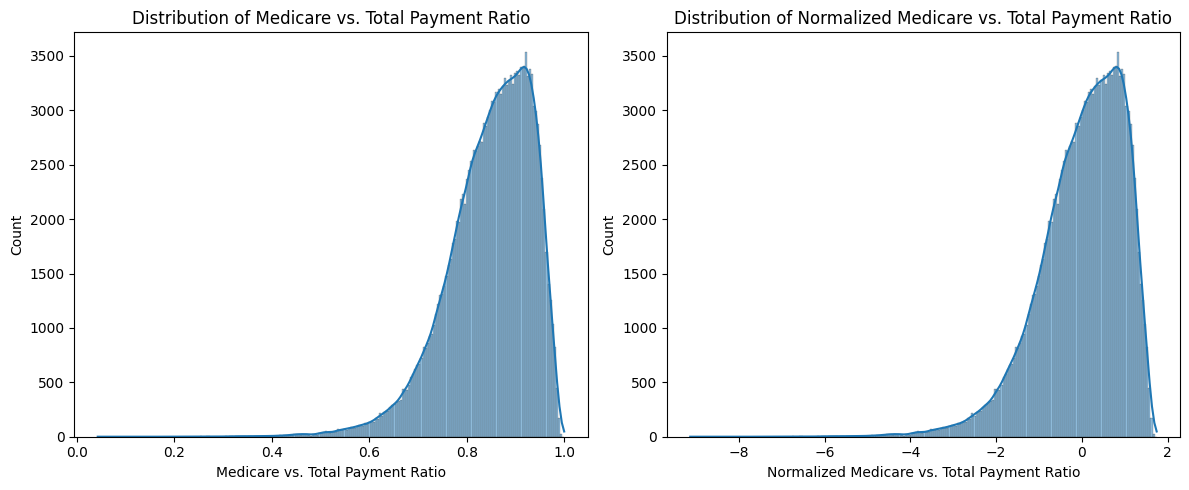

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(data_with_benchmark['Medicare_vs_Total_Payment_Ratio'], kde=True)
plt.title('Distribution of Medicare vs. Total Payment Ratio')
plt.xlabel('Medicare vs. Total Payment Ratio')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(data_with_benchmark['Medicare_vs_Total_Payment_Ratio_Normalized'], kde=True)
plt.title('Distribution of Normalized Medicare vs. Total Payment Ratio')
plt.xlabel('Normalized Medicare vs. Total Payment Ratio')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [33]:
# Filter the data for normalized Medicare vs. Total Payment Ratio > 1
high_ratio_data = data_with_benchmark[data_with_benchmark['Medicare_vs_Total_Payment_Ratio_Normalized'] > 1]

# Count the occurrences for each DRG in the filtered data
drg_counts_high_ratio = high_ratio_data['DRG'].value_counts().reset_index()
drg_counts_high_ratio.columns = ['DRG', 'Count_Normalized_Ratio_GreaterThan_1']

# Display the counts
display(drg_counts_high_ratio)

,DRG,Count_Normalized_Ratio_GreaterThan_1
0,177 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,1209
1,208 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,1185
2,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,1063
3,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,1056
4,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,982
...,...,...
95,313 - CHEST PAIN,0
96,390 - G.I. OBSTRUCTION W/O CC/MCC,0
97,536 - FRACTURES OF HIP & PELVIS W/O MCC,0
98,"563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP,...",0


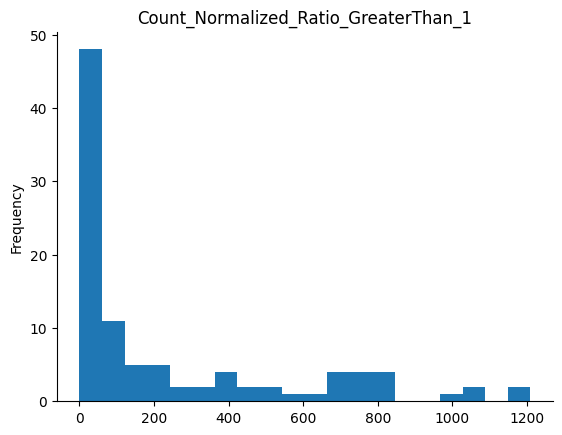

In [34]:
drg_counts_high_ratio['Count_Normalized_Ratio_GreaterThan_1'].plot(kind='hist', bins=20, title='Count_Normalized_Ratio_GreaterThan_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Feature 6: Hospital Volume Quartile (based on Total Discharges for the DRG)

Categorizing hospitals by the volume of cases for a specific DRG allows us to see if potential abuse patterns differ based on how frequently a hospital handles that type of case.

In [35]:
# Calculate quartiles for 'Total_Discharges' for each DRG and State combination
# This will create volume categories relative to peers in the same State-DRG group.
# Modified to handle cases with insufficient unique values for qcut within groups
def safe_qcut(x, q, labels=False, duplicates='drop'):
    try:
        return pd.qcut(x, q, labels=labels, duplicates=duplicates)
    except ValueError:
        # If qcut fails due to too few unique values, return a constant or handle as needed.
        # For simplicity, we'll return NaN for these cases, which can be filled later.
        return pd.Series(np.nan, index=x.index)


data_with_benchmark['Volume_Quartile_State_DRG'] = data_with_benchmark.groupby(['Provider_State', 'DRG'])['Total_Discharges'].transform(
    lambda x: safe_qcut(x, 4, labels=False, duplicates='drop')
)


# Fill potential NaN values that might arise from groups with fewer than 4 unique discharge values
# We can fill with -1 or perhaps the mode if appropriate, or leave as NaN depending on the next step.
# Filling with -1 for now as in the original code.
data_with_benchmark['Volume_Quartile_State_DRG'] = data_with_benchmark['Volume_Quartile_State_DRG'].fillna(-1).astype(int)


# Categorize based on overall hospital volume (total discharges across all DRGs)
# First, calculate total discharges per hospital across all DRGs if not already present
if 'Overall_Hospital_Total_Discharges' not in data_with_benchmark.columns:
    hospital_total_discharges = data_with_benchmark.groupby('Provider_Id')['Total_Discharges'].sum().reset_index()
    hospital_total_discharges.columns = ['Provider_Id', 'Overall_Hospital_Total_Discharges']

    # Merge this back to the main dataframe
    data_with_benchmark = pd.merge(data_with_benchmark, hospital_total_discharges, on='Provider_Id', how='left')

# Determine the correct column name after merge - it should be 'Overall_Hospital_Total_Discharges'
overall_total_discharges_col = 'Overall_Hospital_Total_Discharges'

# Create quartiles based on overall hospital total discharges using pd.cut with quantile edges
try:
    # Calculate quantile edges
    quantile_edges = data_with_benchmark[overall_total_discharges_col].quantile([0, 0.25, 0.5, 0.75, 1]).tolist()
    # Use pd.cut with the calculated edges
    data_with_benchmark['Overall_Hospital_Volume_Quartile'] = pd.cut(data_with_benchmark[overall_total_discharges_col],
                                                                     bins=quantile_edges,
                                                                     labels=False,
                                                                     include_lowest=True,
                                                                     duplicates='drop')
except ValueError:
     # Fallback if quantile edges are not unique enough for pd.cut bins
     data_with_benchmark['Overall_Hospital_Volume_Quartile'] = safe_qcut(data_with_benchmark[overall_total_discharges_col], 4, labels=False, duplicates='drop')


# Fill potential NaN values that might arise from issues with binning
data_with_benchmark['Overall_Hospital_Volume_Quartile'] = data_with_benchmark['Overall_Hospital_Volume_Quartile'].fillna(-1).astype(int)


# Display the first few rows with the new features
display(data_with_benchmark[['Provider_Name', 'DRG', 'Total_Discharges', 'Volume_Quartile_State_DRG', 'Overall_Hospital_Total_Discharges', 'Overall_Hospital_Volume_Quartile']].head())

/tmp/ipython-input-35-541862707.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_with_benchmark['Volume_Quartile_State_DRG'] = data_with_benchmark.groupby(['Provider_State', 'DRG'])['Total_Discharges'].transform(
/tmp/ipython-input-35-541862707.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hospital_total_discharges = data_with_benchmark.groupby('Provider_Id')['Total_Discharges'].sum().reset_index()


,Provider_Name,DRG,Total_Discharges,Volume_Quartile_State_DRG,Overall_Hospital_Total_Discharges,Overall_Hospital_Volume_Quartile
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,91,3,5405,3
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,14,0,1419,0
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,24,1,3901,2
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,25,1,2917,2
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,18,0,2519,1


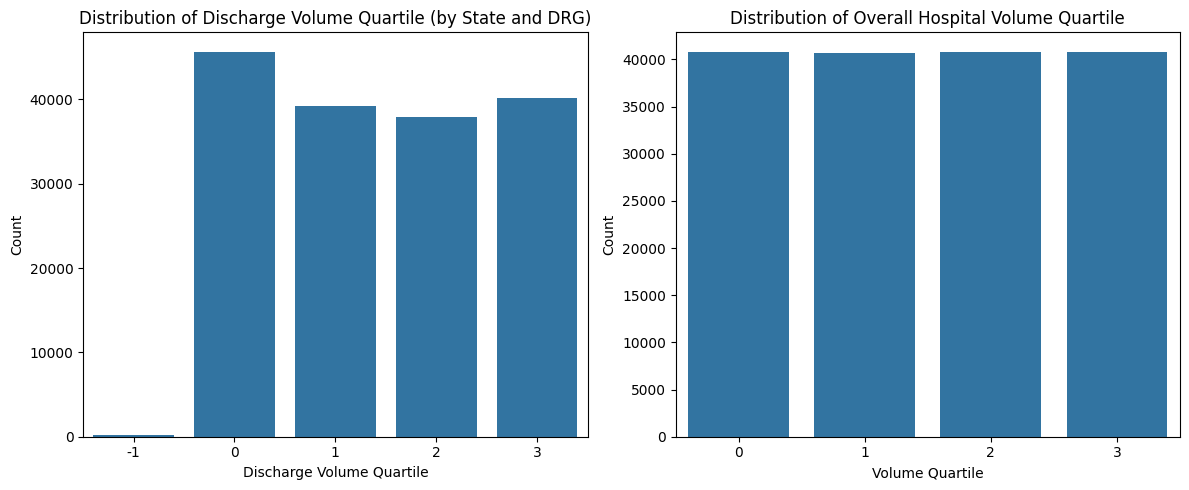

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.countplot(x='Volume_Quartile_State_DRG', data=data_with_benchmark)
plt.title('Distribution of Discharge Volume Quartile (by State and DRG)')
plt.xlabel('Discharge Volume Quartile')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.countplot(x='Overall_Hospital_Volume_Quartile', data=data_with_benchmark)
plt.title('Distribution of Overall Hospital Volume Quartile')
plt.xlabel('Volume Quartile')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Feature 7: average medicare payment per discharge (normalized within state/drg)


Calculated the average Medicare payment per discharge for each State/DRG combination as a benchmark, then calculated and normalize the difference and ratio of each hospital's Medicare payment compared to this benchmark.

**Why we care**:
Directly compares a hospital's average Medicare payment for a specific procedure to the average of its peers in the same state and for the same procedure, after accounting for variations in scale. This helps to highlight hospitals where Medicare payments are unusually high or low relative to similar hospitals performing the same type of care, which could be an indicator of potential over- or under-utilization of resources or unusual billing practices.


In [37]:
# Calculate the benchmark: average Average Medicare Payment per State and DRG
state_drg_medicare_payment_benchmark = data_with_benchmark.groupby(['Provider_State', 'DRG'])['Average_Medicare_Payment'].mean().reset_index()
state_drg_medicare_payment_benchmark.columns = ['Provider_State', 'DRG', 'Avg_Medicare_Payment_ByStateDRG']

# Merge this benchmark with the main data
data_with_benchmark = pd.merge(data_with_benchmark, state_drg_medicare_payment_benchmark, on=['Provider_State', 'DRG'], how='left')

# Create features: difference and ratio of a hospital's average Medicare payment compared to the State-DRG benchmark
data_with_benchmark['Medicare_Payment_vs_StateDRG_Diff'] = data_with_benchmark['Average_Medicare_Payment'] - data_with_benchmark['Avg_Medicare_Payment_ByStateDRG']
data_with_benchmark['Medicare_Payment_vs_StateDRG_Ratio'] = data_with_benchmark['Average_Medicare_Payment'] / data_with_benchmark['Avg_Medicare_Payment_ByStateDRG']

# Handle potential division by zero or infinite values
data_with_benchmark['Medicare_Payment_vs_StateDRG_Ratio'] = data_with_benchmark['Medicare_Payment_vs_StateDRG_Ratio'].replace([np.inf, -np.inf], np.nan)

# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_normalize_medicare_state_drg = ['Medicare_Payment_vs_StateDRG_Diff', 'Medicare_Payment_vs_StateDRG_Ratio']
data_with_benchmark[features_to_normalize_medicare_state_drg] = scaler.fit_transform(data_with_benchmark[features_to_normalize_medicare_state_drg])

# Display the first few rows with the new features
display(data_with_benchmark[['Provider_Name', 'DRG', 'Average_Medicare_Payment', 'Avg_Medicare_Payment_ByStateDRG', 'Medicare_Payment_vs_StateDRG_Diff', 'Medicare_Payment_vs_StateDRG_Ratio']].head())

/tmp/ipython-input-37-391114443.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_drg_medicare_payment_benchmark = data_with_benchmark.groupby(['Provider_State', 'DRG'])['Average_Medicare_Payment'].mean().reset_index()


,Provider_Name,DRG,Average_Medicare_Payment,Avg_Medicare_Payment_ByStateDRG,Medicare_Payment_vs_StateDRG_Diff,Medicare_Payment_vs_StateDRG_Ratio
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4763.73,4599.593043,0.067074,0.165907
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4976.71,4599.593043,0.154108,0.381184
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4453.79,4599.593043,-0.059582,-0.147376
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4129.16,4599.593043,-0.192241,-0.475507
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4851.44,4599.593043,0.102916,0.254563


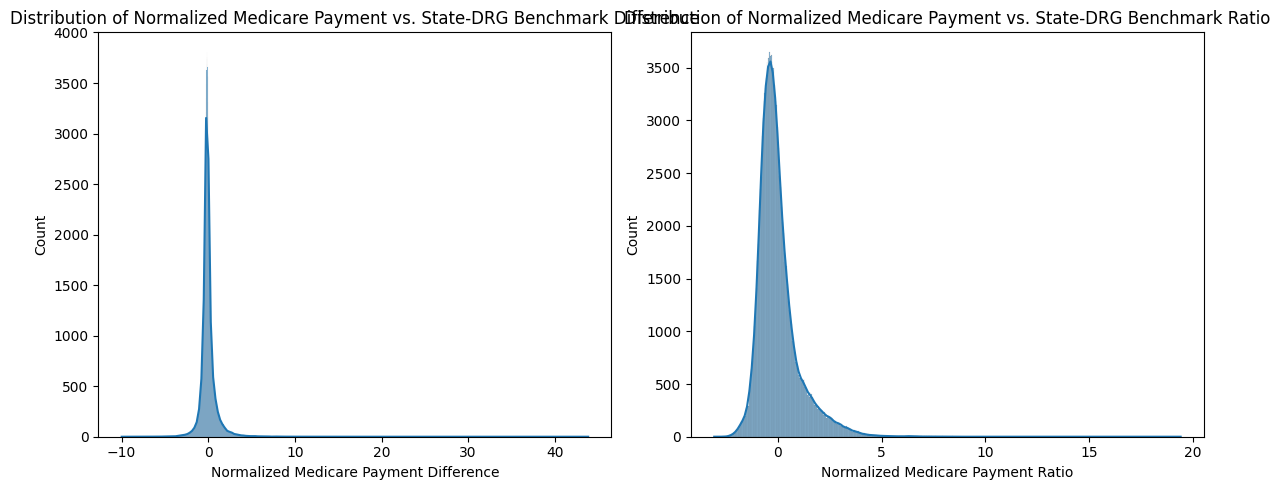

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(data_with_benchmark['Medicare_Payment_vs_StateDRG_Diff'], kde=True)
plt.title('Distribution of Normalized Medicare Payment vs. State-DRG Benchmark Difference')
plt.xlabel('Normalized Medicare Payment Difference')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(data_with_benchmark['Medicare_Payment_vs_StateDRG_Ratio'], kde=True)
plt.title('Distribution of Normalized Medicare Payment vs. State-DRG Benchmark Ratio')
plt.xlabel('Normalized Medicare Payment Ratio')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

**Reasoning**:
The histograms of the normalized Medicare payment vs. State-DRG benchmark features have been displayed. To further understand the distributions and identify potential outliers, box plots are useful.



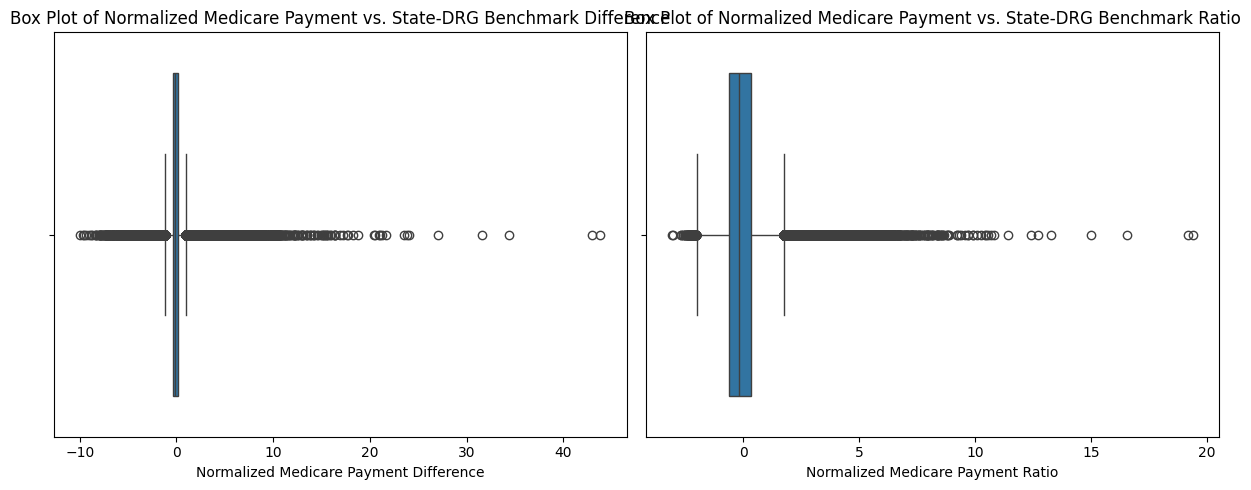

In [39]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.boxplot(x=data_with_benchmark['Medicare_Payment_vs_StateDRG_Diff'])
plt.title('Box Plot of Normalized Medicare Payment vs. State-DRG Benchmark Difference')
plt.xlabel('Normalized Medicare Payment Difference')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.boxplot(x=data_with_benchmark['Medicare_Payment_vs_StateDRG_Ratio'])
plt.title('Box Plot of Normalized Medicare Payment vs. State-DRG Benchmark Ratio')
plt.xlabel('Normalized Medicare Payment Ratio')

plt.tight_layout()
plt.show()

## Feature 8: ratio of medicare payment vs. benchmark to total payment vs. benchmark



**Why we care**: Captures the relationship between a hospital's Medicare payment and its benchmark. Explains its total payment deviation from its benchmark for the same procedure. Significant deviations in this ratio could pinpoint hospitals with unusual billing patterns or cost structures specifically related to Medicare, potentially highlighting areas of overcharging or inefficient resource use compared to peers.


In [40]:
# Calculate the ratio of the normalized Medicare Payment vs. DRG Benchmark Difference to the normalized Payment vs. Benchmark Difference
# Handle potential division by zero by adding a small epsilon or using a dedicated function if needed,
# but given these are already normalized with a mean of 0, direct division will work,
# and we will replace inf values with NaN.
data_with_benchmark['Medicare_vs_Total_Benchmark_Ratio'] = data_with_benchmark['Medicare_Payment_vs_DRG_Diff'] / data_with_benchmark['Payment_vs_Benchmark_Diff']

# Replace any resulting infinite values with NaN
data_with_benchmark['Medicare_vs_Total_Benchmark_Ratio'] = data_with_benchmark['Medicare_vs_Total_Benchmark_Ratio'].replace([np.inf, -np.inf], np.nan)

# Normalize the new feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_with_benchmark['Medicare_vs_Total_Benchmark_Ratio_Normalized'] = scaler.fit_transform(data_with_benchmark[['Medicare_vs_Total_Benchmark_Ratio']].dropna()) # Handle NaNs for normalization

# Display the first few rows with the new features
display(data_with_benchmark[['Medicare_Payment_vs_DRG_Diff', 'Payment_vs_Benchmark_Diff', 'Medicare_vs_Total_Benchmark_Ratio', 'Medicare_vs_Total_Benchmark_Ratio_Normalized']].head())

,Medicare_Payment_vs_DRG_Diff,Payment_vs_Benchmark_Diff,Medicare_vs_Total_Benchmark_Ratio,Medicare_vs_Total_Benchmark_Ratio_Normalized
0,-0.268057,0.012932,-20.727974,-0.016304
1,-0.195983,0.016905,-11.593400,-0.016304
2,-0.372944,-0.118700,3.141917,-0.016304
3,-0.482803,-0.125387,3.850494,-0.016304
4,-0.238376,-0.032796,7.268401,-0.016304


## Feature 9: discharge volume deviation (normalized within state/drg)



**Why we care**: Explains how a hospital's discharge volume for a specific DRG compares to the average discharge volume for the same DRG within the same state, after normalization. Deviations from the norm in discharge volume could suggest that a hospital is handling an unusually high or low number of cases for a particular procedure compared to its peers. This might be relevant for identifying potential over-utilization (unusually high volume) or under-utilization (unusually low volume that could impact efficiency or expertise) of resources, which could be further investigated alongside payment deviations.


In [41]:
# Calculate the benchmark: average total discharges per State/DRG combination
state_drg_discharge_benchmark = data_with_benchmark.groupby(['Provider_State', 'DRG'])['Total_Discharges'].mean().reset_index()
state_drg_discharge_benchmark.columns = ['Provider_State', 'DRG', 'Avg_Discharges_ByStateDRG']

# Merge this benchmark with the main data
data_with_benchmark = pd.merge(data_with_benchmark, state_drg_discharge_benchmark, on=['Provider_State', 'DRG'], how='left')

# Create features: difference and ratio of a hospital's total discharges compared to the State-DRG benchmark
data_with_benchmark['Discharges_vs_StateDRG_Diff'] = data_with_benchmark['Total_Discharges'] - data_with_benchmark['Avg_Discharges_ByStateDRG']
data_with_benchmark['Discharges_vs_StateDRG_Ratio'] = data_with_benchmark['Total_Discharges'] / data_with_benchmark['Avg_Discharges_ByStateDRG']

# Replace any resulting infinite values with NaN
data_with_benchmark['Discharges_vs_StateDRG_Ratio'] = data_with_benchmark['Discharges_vs_StateDRG_Ratio'].replace([np.inf, -np.inf], np.nan)

# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_normalize_discharges_state_drg = ['Discharges_vs_StateDRG_Diff', 'Discharges_vs_StateDRG_Ratio']
data_with_benchmark[features_to_normalize_discharges_state_drg] = scaler.fit_transform(data_with_benchmark[features_to_normalize_discharges_state_drg].dropna()) # Handle NaNs for normalization


# Display the first few rows with the new features
display(data_with_benchmark[['Provider_Name', 'DRG', 'Provider_State', 'Total_Discharges', 'Avg_Discharges_ByStateDRG', 'Discharges_vs_StateDRG_Diff', 'Discharges_vs_StateDRG_Ratio']].head())

/tmp/ipython-input-41-342812487.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_drg_discharge_benchmark = data_with_benchmark.groupby(['Provider_State', 'DRG'])['Total_Discharges'].mean().reset_index()


,Provider_Name,DRG,Provider_State,Total_Discharges,Avg_Discharges_ByStateDRG,Discharges_vs_StateDRG_Diff,Discharges_vs_StateDRG_Ratio
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,91,38.217391,1.232674,2.013039
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,14,38.217391,-0.565568,-0.923610
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,24,38.217391,-0.332030,-0.542227
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,25,38.217391,-0.308676,-0.504089
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,18,38.217391,-0.472153,-0.771057


#Plots

In [42]:
# Select the normalized features to aggregate
normalized_features = [
    'Payment_vs_Benchmark_Ratio',
    'Medicare_Payment_vs_DRG_Ratio',
    'Medicare_vs_Total_Payment_Ratio_Normalized',
    'Discharges_vs_DRG_Ratio',
    'Discharges_vs_StateDRG_Ratio',
    'Medicare_Payment_vs_StateDRG_Ratio'
]

# Ensure the selected features exist in the dataframe before aggregation
existing_normalized_features = [feature for feature in normalized_features if feature in data_with_benchmark.columns]

# Group by Provider_Id and calculate the mean of the selected normalized features
provider_aggregated_features = data_with_benchmark.groupby('Provider_Id')[existing_normalized_features].mean().reset_index()

# Rename the columns to reflect aggregation
new_aggregated_column_names = {
    feature: f'{feature}_mean_by_provider' for feature in existing_normalized_features
}
provider_aggregated_features = provider_aggregated_features.rename(columns=new_aggregated_column_names)

# Merge aggregated features back into the main dataframe
data_with_benchmark = pd.merge(data_with_benchmark, provider_aggregated_features, on='Provider_Id', how='left')

# Display the head of the dataframe with the new aggregated features
display(data_with_benchmark.head())

/tmp/ipython-input-42-4109071675.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  provider_aggregated_features = data_with_benchmark.groupby('Provider_Id')[existing_normalized_features].mean().reset_index()


,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Medicare_vs_Total_Benchmark_Ratio_Normalized,Avg_Discharges_ByStateDRG,Discharges_vs_StateDRG_Diff,Discharges_vs_StateDRG_Ratio,Payment_vs_Benchmark_Ratio_mean_by_provider,Medicare_Payment_vs_DRG_Ratio_mean_by_provider,Medicare_vs_Total_Payment_Ratio_Normalized_mean_by_provider,Discharges_vs_DRG_Ratio_mean_by_provider,Discharges_vs_StateDRG_Ratio_mean_by_provider,Medicare_Payment_vs_StateDRG_Ratio_mean_by_provider
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,...,-0.016304,38.217391,1.232674,2.013039,-0.068601,-0.733276,-0.085725,0.494592,0.689677,-0.021144
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,...,-0.016304,38.217391,-0.565568,-0.923610,0.050760,-0.644785,-0.198068,-0.477297,-0.416489,0.099806
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,...,-0.016304,38.217391,-0.332030,-0.542227,-0.309019,-0.901342,-0.211777,0.058188,0.196908,-0.298005
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,...,-0.016304,38.217391,-0.308676,-0.504089,-0.086278,-0.850285,-0.515159,-0.256647,-0.196614,-0.216196
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,...,-0.016304,38.217391,-0.472153,-0.771057,-0.060673,-0.783871,-0.378453,-0.308321,-0.259702,-0.116951


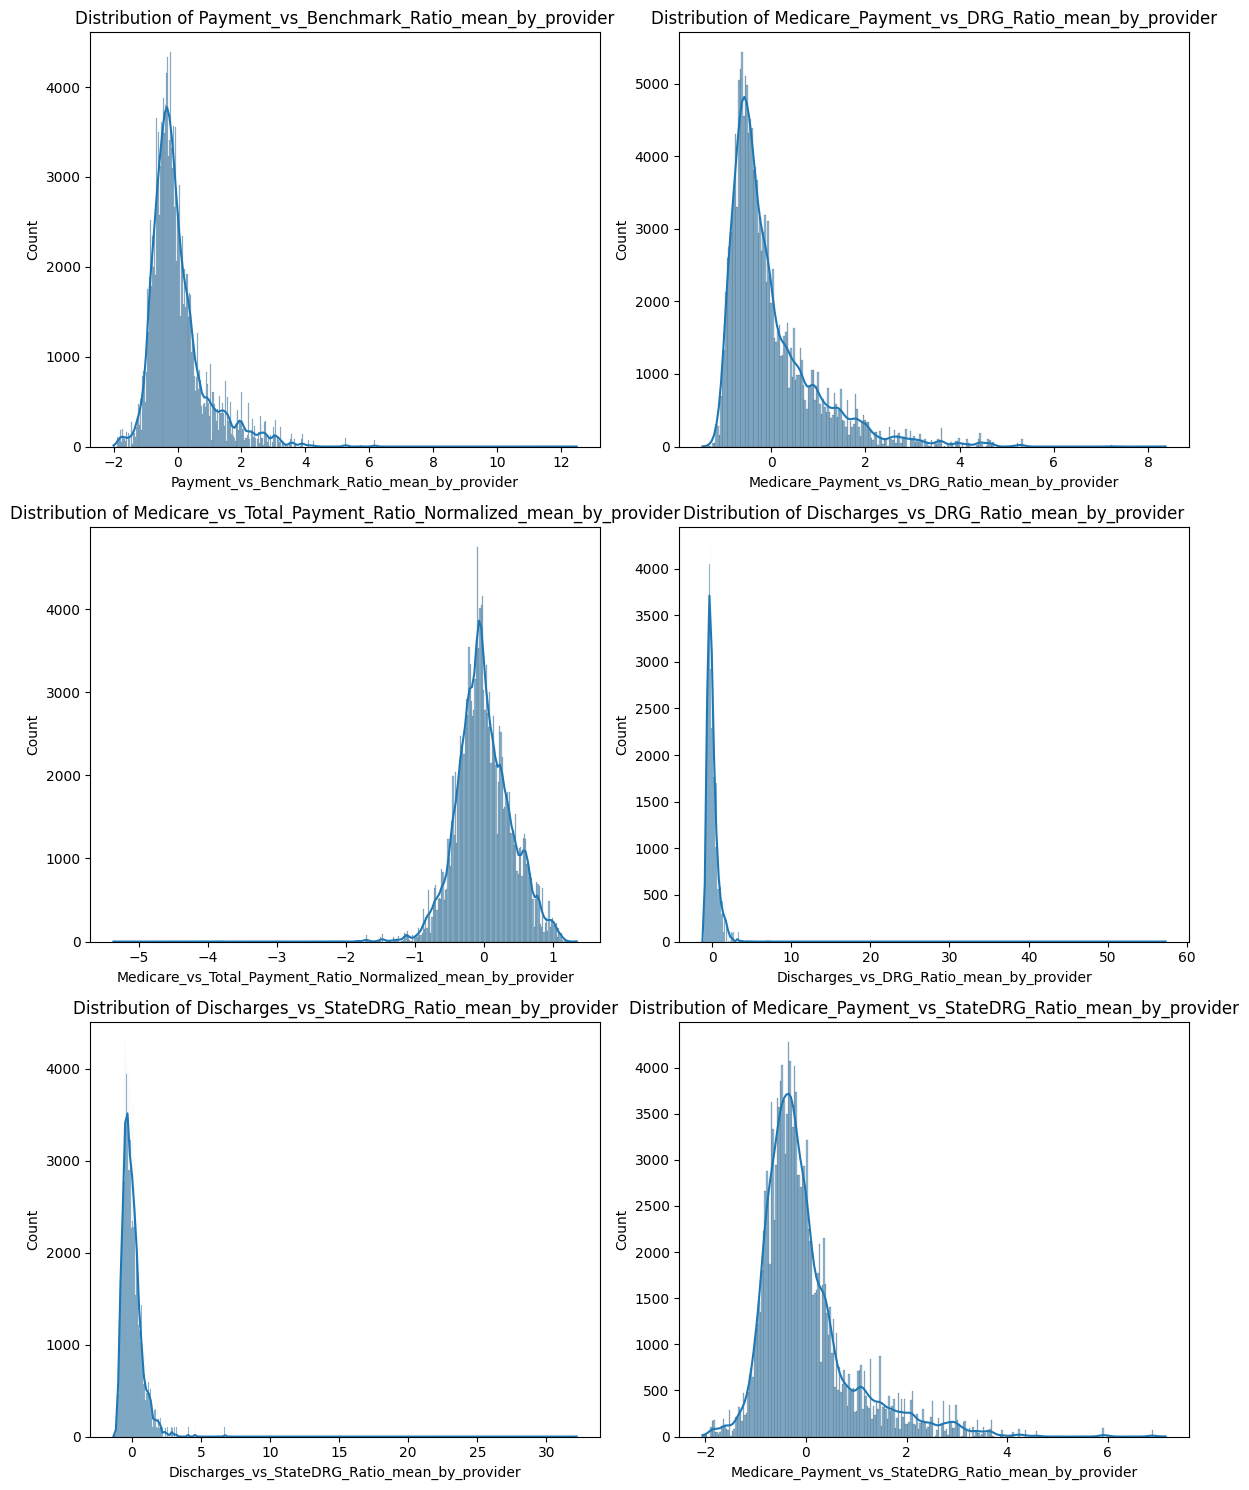

In [43]:
# List of normalized aggregated features to plot
aggregated_features_to_plot = [
    'Payment_vs_Benchmark_Ratio_mean_by_provider',
    'Medicare_Payment_vs_DRG_Ratio_mean_by_provider',
    'Medicare_vs_Total_Payment_Ratio_Normalized_mean_by_provider',
    'Discharges_vs_DRG_Ratio_mean_by_provider',
    'Discharges_vs_StateDRG_Ratio_mean_by_provider',
    'Medicare_Payment_vs_StateDRG_Ratio_mean_by_provider'
]

# Create histograms for each aggregated feature
n_features = len(aggregated_features_to_plot)
n_cols = 2  # Number of columns for subplots
n_rows = (n_features + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(12, n_rows * 5))

for i, feature in enumerate(aggregated_features_to_plot):
     plt.subplot(n_rows, n_cols, i + 1)
     sns.histplot(data_with_benchmark[feature], kde=True)
     plt.title(f'Distribution of {feature}')
     plt.xlabel(feature)
     plt.ylabel('Count')

plt.tight_layout()
plt.show()

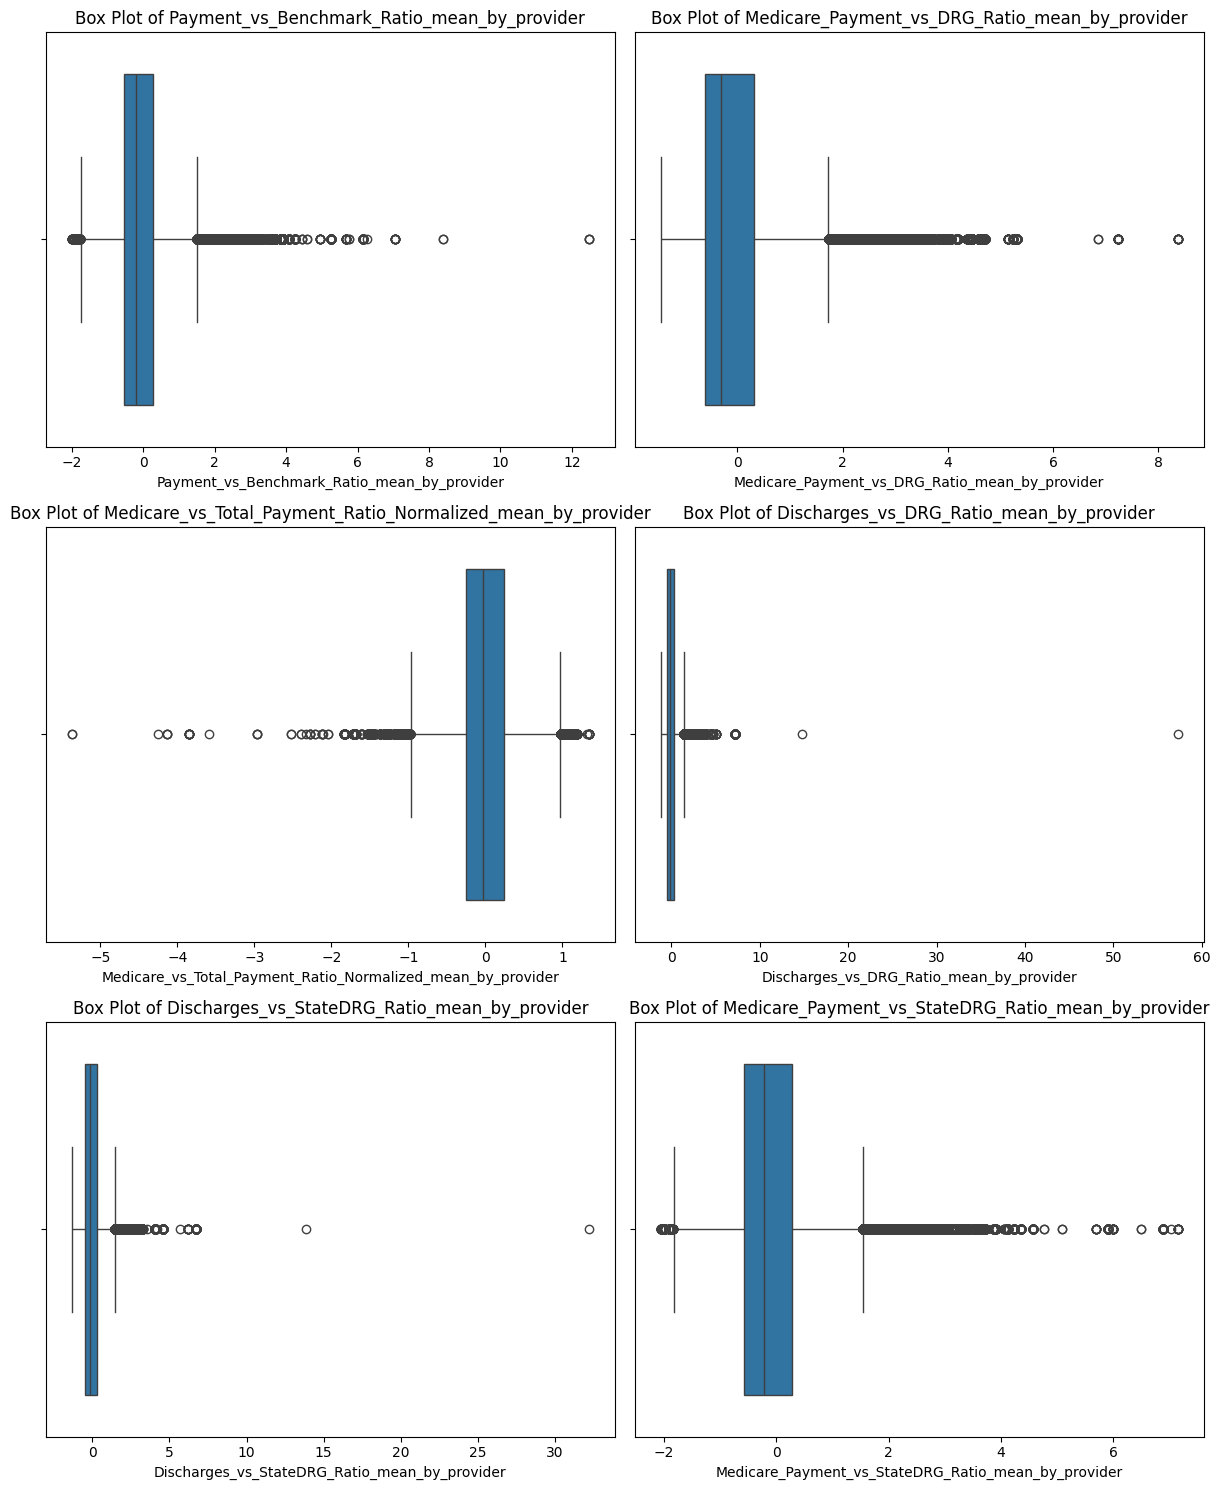

In [44]:
# List of normalized aggregated features to plot
aggregated_features_to_plot = [
    'Payment_vs_Benchmark_Ratio_mean_by_provider',
    'Medicare_Payment_vs_DRG_Ratio_mean_by_provider',
    'Medicare_vs_Total_Payment_Ratio_Normalized_mean_by_provider',
    'Discharges_vs_DRG_Ratio_mean_by_provider',
    'Discharges_vs_StateDRG_Ratio_mean_by_provider',
    'Medicare_Payment_vs_StateDRG_Ratio_mean_by_provider'
]

# Create box plots for each aggregated feature
n_features = len(aggregated_features_to_plot)
n_cols = 2  # Number of columns for subplots
n_rows = (n_features + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(12, n_rows * 5))

for i, feature in enumerate(aggregated_features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=data_with_benchmark[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()



*   `Payment_vs_Benchmark_Ratio_mean_by_provider`: This is the mean of the normalized Payment vs. Benchmark Ratio (derived from **Feature 1**) aggregated at the Provider level. It indicates, on average across all DRGs, how a hospital's total payment compares to the State & DRG benchmark.
*   `Medicare_Payment_vs_DRG_Ratio_mean_by_provider`: This is the mean of the normalized Medicare Payment vs. DRG Benchmark Ratio (derived from **Feature 4**) aggregated at the Provider level. It shows, on average across all DRGs, how a hospital's Medicare payment compares to the overall DRG benchmark.
*   `Medicare_vs_Total_Payment_Ratio_Normalized_mean_by_provider`: This is the mean of the normalized Medicare vs. Total Payment Ratio (**Feature 5**) aggregated at the Provider level. It represents, on average, the proportion of a hospital's total payment that comes from Medicare, relative to the overall distribution of this ratio.
*   `Discharges_vs_DRG_Ratio_mean_by_provider`: This is the mean of the normalized Discharges vs. DRG Ratio (derived from **Feature 3**) aggregated at the Provider level. It indicates, on average across all DRGs, how a hospital's discharge volume for a specific DRG compares to the overall DRG average.
*   `Discharges_vs_StateDRG_Ratio_mean_by_provider`: This is the mean of the normalized Discharges vs. State-DRG Ratio (derived from **Feature 9**) aggregated at the Provider level. It shows, on average across all DRGs, how a hospital's discharge volume for a specific DRG compares to the average for the same DRG within the same state.
*   `Medicare_Payment_vs_StateDRG_Ratio_mean_by_provider`: This is the mean of the normalized Medicare Payment vs. State-DRG Ratio (derived from **Feature 7**) aggregated at the Provider level. It indicates, on average across all DRGs, how a hospital's Medicare payment compares to the State & DRG benchmark.

## Feature 10: Ratio of Average Medicare Payment to Average Total Payments (Normalized within State/DRG)

**Why we care**: This feature calculates the ratio of Medicare payments to total payments specifically within each State/DRG group and then normalizes this localized ratio. This provides a more granular comparison of the Medicare share of total payments relative to immediate peers, highlighting hospitals where this proportion is unusual within their specific context.

In [45]:
# Calculate the ratio of Average Medicare Payment to Average Total Payments within each State/DRG group
data_with_benchmark['Medicare_vs_Total_Payment_Ratio_StateDRG'] = data_with_benchmark['Average_Medicare_Payment'] / data_with_benchmark['Average_Total_Payments']

# Handle potential division by zero or infinite values
data_with_benchmark['Medicare_vs_Total_Payment_Ratio_StateDRG'] = data_with_benchmark['Medicare_vs_Total_Payment_Ratio_StateDRG'].replace([np.inf, -np.inf], np.nan)

# Normalize this new ratio within each State/DRG group
# We will use groupby().transform() to apply StandardScaler within each group
def normalize_within_group(group):
    if len(group) > 1 and group.dropna().std() > 0:
        # Apply StandardScaler to the non-null values in the group
        non_null_values = group.dropna().values.reshape(-1, 1)
        scaler = StandardScaler()
        normalized_values = scaler.fit_transform(non_null_values)
        # Create a new series with normalized values, aligning index with original group
        normalized_series = pd.Series(normalized_values.flatten(), index=group.dropna().index)
        # Fill back into a series with the original index, leaving NaNs where they were
        result = pd.Series(np.nan, index=group.index)
        result.loc[normalized_series.index] = normalized_series
        return result
    else:
        # If the group has 1 or fewer non-null values or standard deviation is 0, return NaNs
        return pd.Series(np.nan, index=group.index)

data_with_benchmark['Medicare_vs_Total_Payment_Ratio_StateDRG_Normalized'] = data_with_benchmark.groupby(['Provider_State', 'DRG'])['Medicare_vs_Total_Payment_Ratio_StateDRG'].transform(normalize_within_group)


# Display the first few rows with the new features
display(data_with_benchmark[['Provider_Name', 'DRG', 'Provider_State', 'Medicare_vs_Total_Payment_Ratio_StateDRG', 'Medicare_vs_Total_Payment_Ratio_StateDRG_Normalized']].head())

,Provider_Name,DRG,Provider_State,Medicare_vs_Total_Payment_Ratio_StateDRG,Medicare_vs_Total_Payment_Ratio_StateDRG_Normalized
0,SOUTHEAST ALABAMA MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,0.824568,0.536722
1,MARSHALL MEDICAL CENTER SOUTH,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,0.859896,1.368690
2,ELIZA COFFEE MEMORIAL HOSPITAL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,0.819472,0.416703
3,ST VINCENT'S EAST,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,0.762181,-0.932504
4,SHELBY BAPTIST MEDICAL CENTER,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,0.857398,1.309852


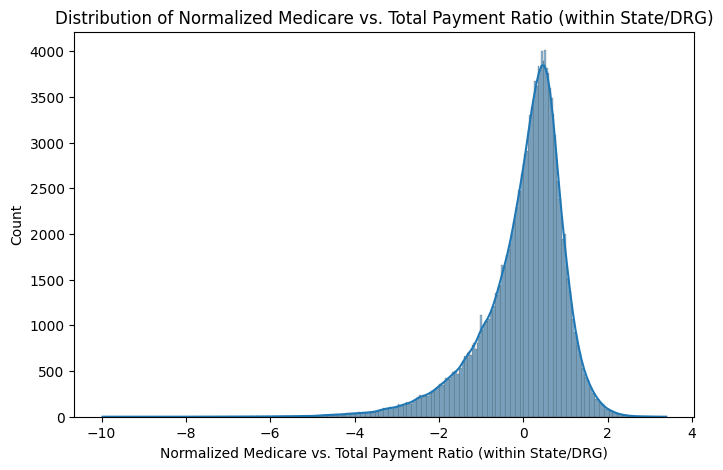

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(data_with_benchmark['Medicare_vs_Total_Payment_Ratio_StateDRG_Normalized'].dropna(), kde=True)
plt.title('Distribution of Normalized Medicare vs. Total Payment Ratio (within State/DRG)')
plt.xlabel('Normalized Medicare vs. Total Payment Ratio (within State/DRG)')
plt.ylabel('Count')
plt.show()

## Feature 12: Geographic Variation - Benchmarks based on Hospital Referral Region

**Why we care**: This feature incorporates the geographic location of hospitals to create benchmarks within Hospital Referral Regions (HRRs). Comparing a hospital's payments or discharge volume to its peers within the same HRR can reveal localized anomalies that might not be apparent when using broader state- or national-level benchmarks. This helps to account for regional variations in costs, practice patterns, or demographics.

In [47]:
# Calculate benchmarks for key metrics within each Hospital Referral Region (HRR)
hrr_benchmark = data_with_benchmark.groupby('Hospital_referral_region_desp').agg(
    Avg_Payment_ByHRR=('Average_Total_Payments', 'mean'),
    Avg_Medicare_Payment_ByHRR=('Average_Medicare_Payment', 'mean'),
    Avg_Discharges_ByHRR=('Total_Discharges', 'mean')
).reset_index()

# Merge these HRR benchmarks with the main data
data_with_benchmark = pd.merge(data_with_benchmark, hrr_benchmark, on='Hospital_referral_region_desp', how='left')

# Create features comparing hospital/DRG values to the HRR benchmarks (Difference and Ratio)

# Average Total Payments vs. HRR Benchmark
data_with_benchmark['Payment_vs_HRR_Diff'] = data_with_benchmark['Average_Total_Payments'] - data_with_benchmark['Avg_Payment_ByHRR']
data_with_benchmark['Payment_vs_HRR_Ratio'] = data_with_benchmark['Average_Total_Payments'] / data_with_benchmark['Avg_Payment_ByHRR']

# Average Medicare Payment vs. HRR Benchmark
data_with_benchmark['Medicare_Payment_vs_HRR_Diff'] = data_with_benchmark['Average_Medicare_Payment'] - data_with_benchmark['Avg_Medicare_Payment_ByHRR']
data_with_benchmark['Medicare_Payment_vs_HRR_Ratio'] = data_with_benchmark['Average_Medicare_Payment'] / data_with_benchmark['Avg_Medicare_Payment_ByHRR']

# Total Discharges vs. HRR Benchmark
data_with_benchmark['Discharges_vs_HRR_Diff'] = data_with_benchmark['Total_Discharges'] - data_with_benchmark['Avg_Discharges_ByHRR']
data_with_benchmark['Discharges_vs_HRR_Ratio'] = data_with_benchmark['Total_Discharges'] / data_with_benchmark['Avg_Discharges_ByHRR']


# Handle potential division by zero or infinite values for ratio features
ratio_cols = ['Payment_vs_HRR_Ratio', 'Medicare_Payment_vs_HRR_Ratio', 'Discharges_vs_HRR_Ratio']
for col in ratio_cols:
    data_with_benchmark[col] = data_with_benchmark[col].replace([np.inf, -np.inf], np.nan)

# Normalize the newly created HRR-based features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
hrr_features_to_normalize = [
    'Payment_vs_HRR_Diff', 'Payment_vs_HRR_Ratio',
    'Medicare_Payment_vs_HRR_Diff', 'Medicare_Payment_vs_HRR_Ratio',
    'Discharges_vs_HRR_Diff', 'Discharges_vs_HRR_Ratio'
]

# Apply normalization, handling NaNs by dropping them for fitting, and then transforming
for feature in hrr_features_to_normalize:
    # Fit scaler on non-null data
    non_null_data = data_with_benchmark[[feature]].dropna()
    if not non_null_data.empty:
        scaler.fit(non_null_data)
        # Transform the original column, result will have NaNs where original was NaN
        data_with_benchmark[f'{feature}_Normalized'] = scaler.transform(data_with_benchmark[[feature]])
    else:
         # If all values are NaN or there's no data, create a column of NaNs
        data_with_benchmark[f'{feature}_Normalized'] = np.nan


# Display the first few rows with the new HRR-based features
display(data_with_benchmark[[
    'Provider_Name', 'Hospital_referral_region_desp',
    'Average_Total_Payments', 'Avg_Payment_ByHRR', 'Payment_vs_HRR_Ratio_Normalized',
    'Average_Medicare_Payment', 'Avg_Medicare_Payment_ByHRR', 'Medicare_Payment_vs_HRR_Ratio_Normalized',
    'Total_Discharges', 'Avg_Discharges_ByHRR', 'Discharges_vs_HRR_Ratio_Normalized'
]].head())

,Provider_Name,Hospital_referral_region_desp,Average_Total_Payments,Avg_Payment_ByHRR,Payment_vs_HRR_Ratio_Normalized,Average_Medicare_Payment,Avg_Medicare_Payment_ByHRR,Medicare_Payment_vs_HRR_Ratio_Normalized,Total_Discharges,Avg_Discharges_ByHRR,Discharges_vs_HRR_Ratio_Normalized
0,SOUTHEAST ALABAMA MEDICAL CENTER,AL - Dothan,5777.24,7038.365971,-0.239682,4763.73,6012.843618,-0.255838,91,38.452941,1.212447
1,MARSHALL MEDICAL CENTER SOUTH,AL - Birmingham,5787.57,7724.118841,-0.335373,4976.71,6577.098107,-0.299664,14,36.255715,-0.544639
2,ELIZA COFFEE MEMORIAL HOSPITAL,AL - Birmingham,5434.95,7724.118841,-0.396440,4453.79,6577.098107,-0.397577,24,36.255715,-0.299920
3,ST VINCENT'S EAST,AL - Birmingham,5417.56,7724.118841,-0.399452,4129.16,6577.098107,-0.458362,25,36.255715,-0.275449
4,SHELBY BAPTIST MEDICAL CENTER,AL - Birmingham,5658.33,7724.118841,-0.357755,4851.44,6577.098107,-0.323120,18,36.255715,-0.446752


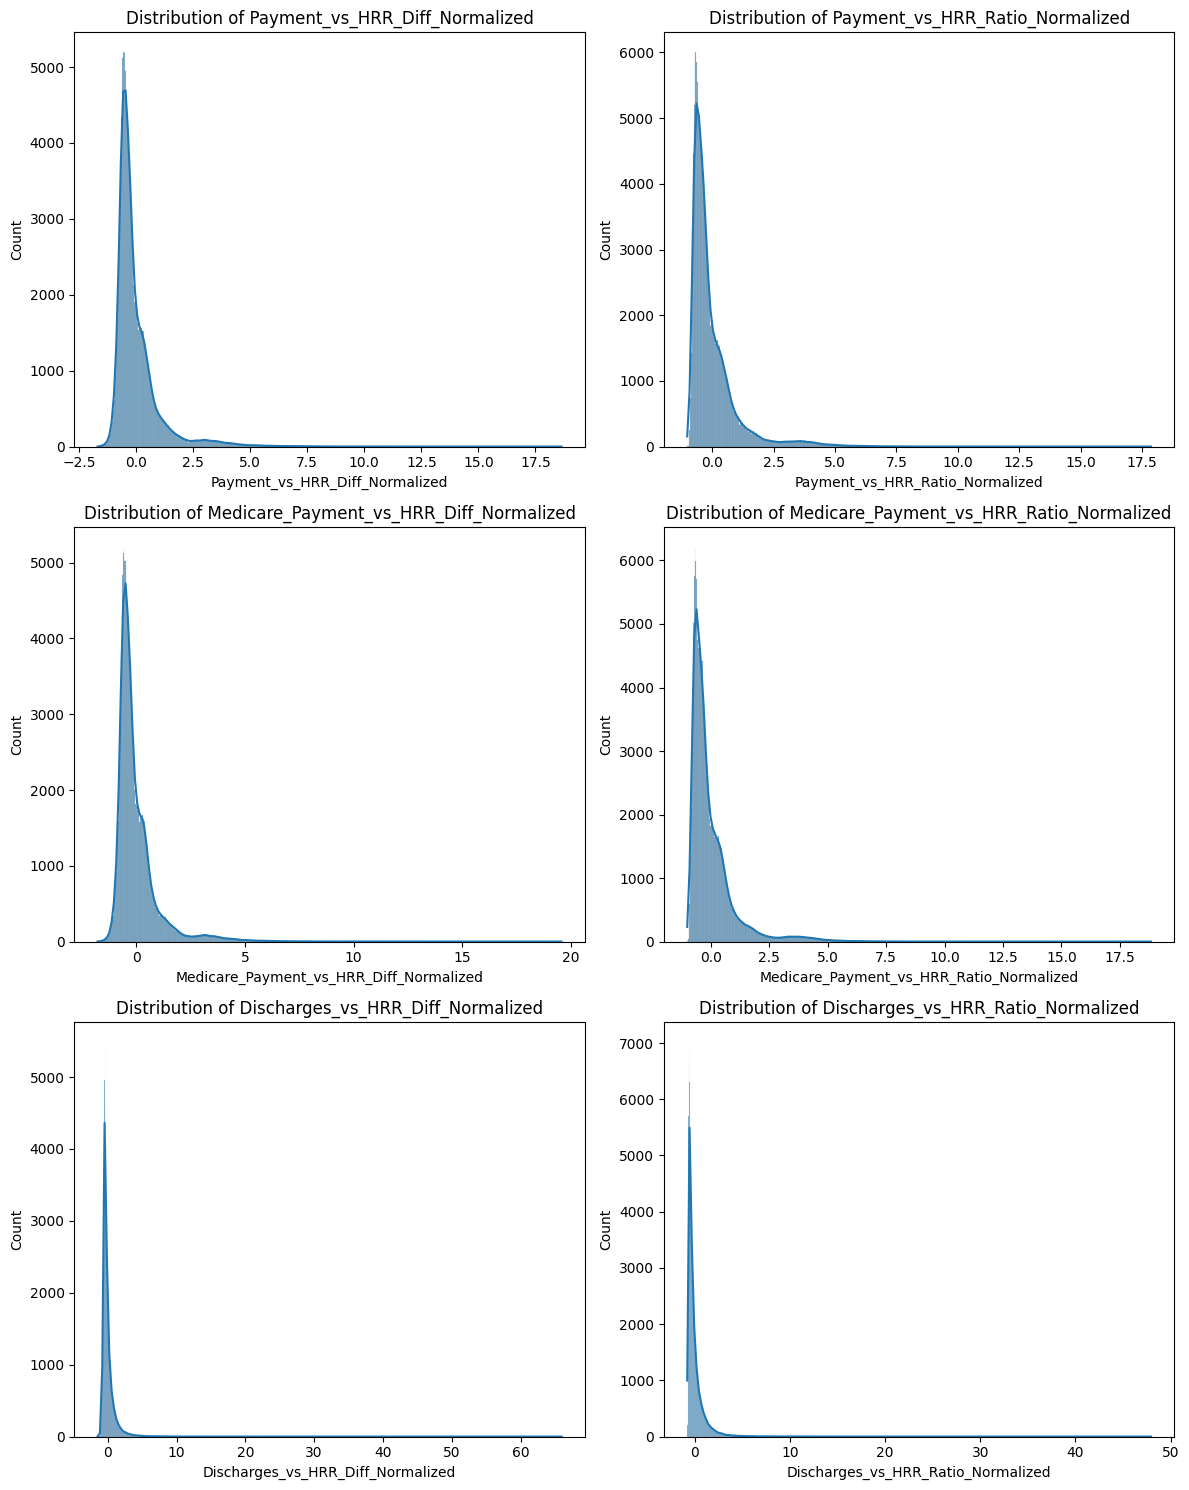

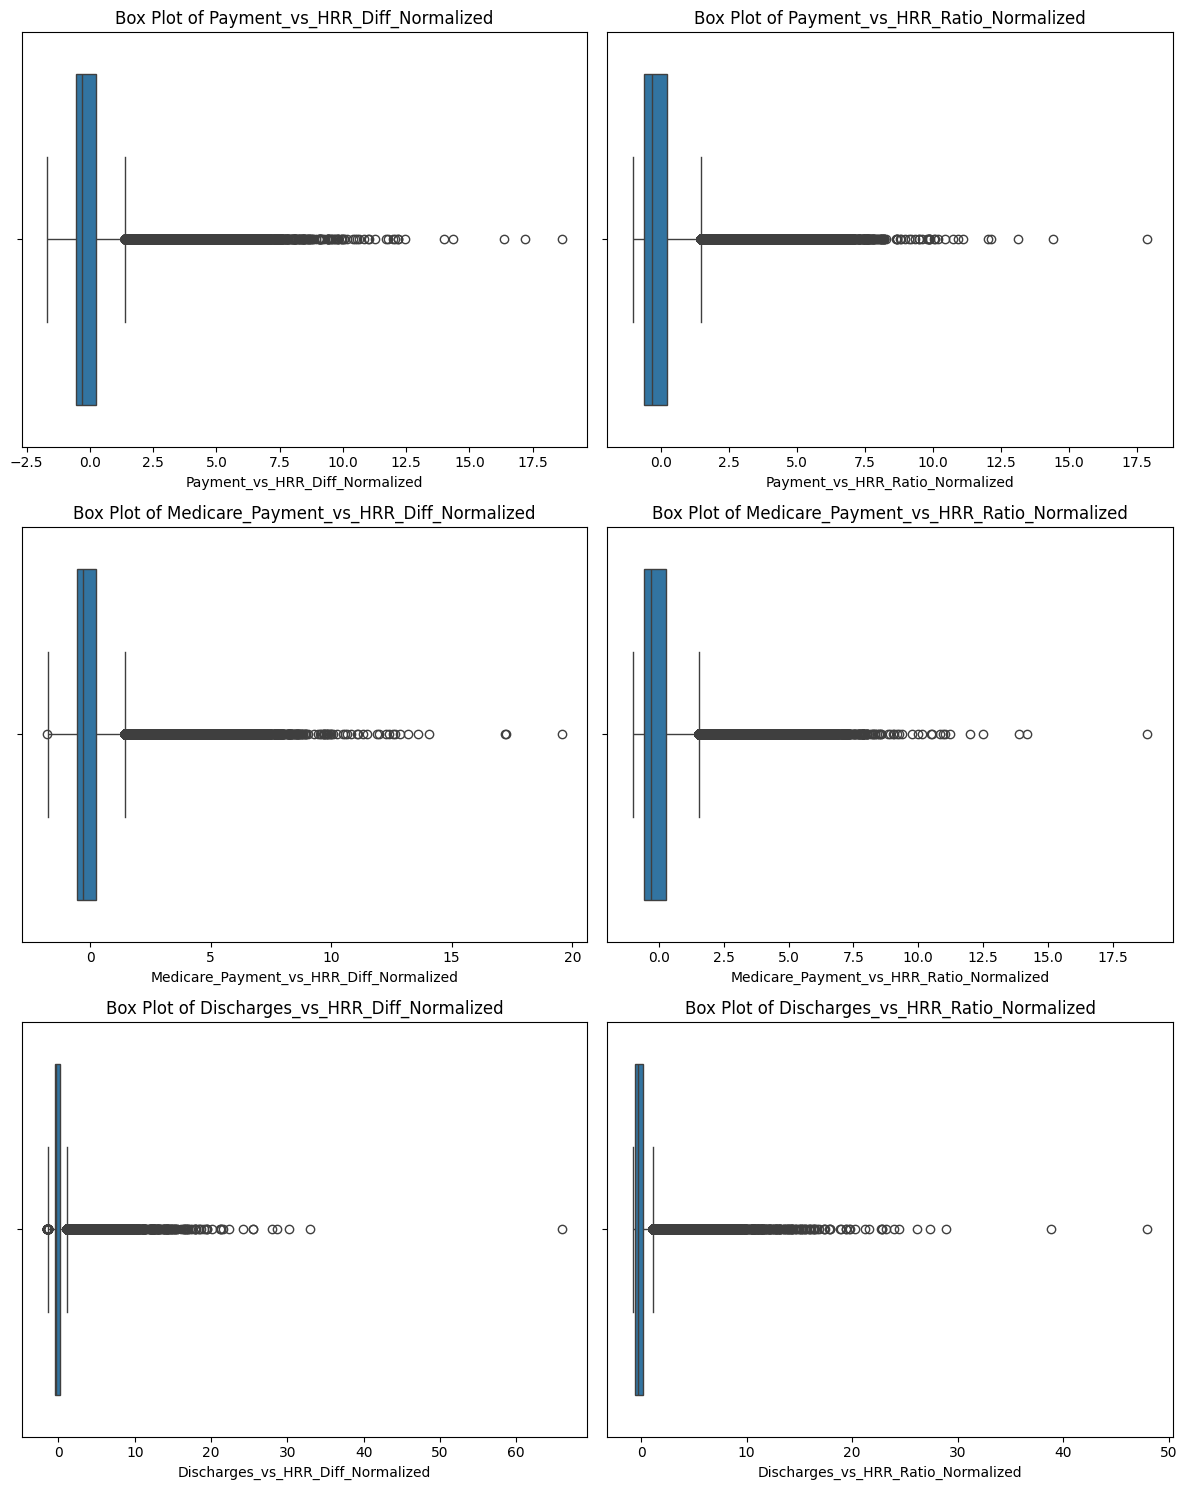

In [48]:
# List of normalized HRR features to plot
hrr_normalized_features_to_plot = [
    'Payment_vs_HRR_Diff_Normalized',
    'Payment_vs_HRR_Ratio_Normalized',
    'Medicare_Payment_vs_HRR_Diff_Normalized',
    'Medicare_Payment_vs_HRR_Ratio_Normalized',
    'Discharges_vs_HRR_Diff_Normalized',
    'Discharges_vs_HRR_Ratio_Normalized'
]

# Create histograms for each normalized HRR feature
n_features_hrr = len(hrr_normalized_features_to_plot)
n_cols_hrr = 2  # Number of columns for subplots
n_rows_hrr = (n_features_hrr + n_cols_hrr - 1) // n_cols_hrr # Calculate number of rows needed

plt.figure(figsize=(12, n_rows_hrr * 5))

for i, feature in enumerate(hrr_normalized_features_to_plot):
     plt.subplot(n_rows_hrr, n_cols_hrr, i + 1)
     sns.histplot(data_with_benchmark[feature].dropna(), kde=True) # Drop NaNs for plotting
     plt.title(f'Distribution of {feature}')
     plt.xlabel(feature)
     plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create box plots for each normalized HRR feature
plt.figure(figsize=(12, n_rows_hrr * 5))

for i, feature in enumerate(hrr_normalized_features_to_plot):
    plt.subplot(n_rows_hrr, n_cols_hrr, i + 1)
    sns.boxplot(x=data_with_benchmark[feature].dropna()) # Drop NaNs for plotting
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

### Merging all Engineered Features for Modeling

In [49]:
# Identify the key columns to keep (identifiers)
identifier_cols = ['Provider_Id', 'DRG', 'Provider_Name', 'Provider_State', 'Hospital_referral_region_desp']

# Identify all engineered features (normalized and aggregated ones)
engineered_features = [col for col in data_with_benchmark.columns if '_Normalized' in col or '_mean_by_provider' in col or 'Volume_Quartile' in col]

# Combine identifiers and engineered features, ensuring no duplicates
final_features_list = list(set(identifier_cols + engineered_features))

# Create the final DataFrame for modeling
data_for_modeling = data_with_benchmark[final_features_list].copy()

# Display the first few rows and the shape of the final DataFrame
print("Shape of the final DataFrame for modeling:", data_for_modeling.shape)
display(data_for_modeling.head())

Shape of the final DataFrame for modeling: (163065, 22)


,Medicare_vs_Total_Benchmark_Ratio_Normalized,Payment_vs_HRR_Diff_Normalized,DRG,Provider_Id,Provider_State,Hospital_referral_region_desp,Discharges_vs_HRR_Ratio_Normalized,Medicare_Payment_vs_HRR_Ratio_Normalized,Discharges_vs_DRG_Ratio_mean_by_provider,Medicare_vs_Total_Payment_Ratio_StateDRG_Normalized,...,Payment_vs_Benchmark_Ratio_mean_by_provider,Medicare_Payment_vs_DRG_Ratio_mean_by_provider,Medicare_Payment_vs_StateDRG_Ratio_mean_by_provider,Discharges_vs_HRR_Diff_Normalized,Volume_Quartile_State_DRG,Medicare_vs_Total_Payment_Ratio_Normalized,Payment_vs_HRR_Ratio_Normalized,Discharges_vs_StateDRG_Ratio_mean_by_provider,Medicare_vs_Total_Payment_Ratio_Normalized_mean_by_provider,Medicare_Payment_vs_HRR_Diff_Normalized
0,-0.016304,-0.168975,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,AL,AL - Dothan,1.212447,-0.255838,0.494592,0.536722,...,-0.068601,-0.733276,-0.021144,1.043182,3,-0.249983,-0.239682,0.689677,-0.085725,-0.175916
1,-0.016304,-0.259473,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,AL,AL - Birmingham,-0.544639,-0.299664,-0.477297,1.368690,...,0.050760,-0.644785,0.099806,-0.441828,0,0.151875,-0.335373,-0.416489,-0.198068,-0.225386
2,-0.016304,-0.306720,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,AL,AL - Birmingham,-0.299920,-0.397577,0.058188,0.416703,...,-0.309019,-0.901342,-0.298005,-0.243305,1,-0.307955,-0.396440,0.196908,-0.211777,-0.299030
3,-0.016304,-0.309050,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,AL,AL - Birmingham,-0.275449,-0.458362,-0.256647,-0.932504,...,-0.086278,-0.850285,-0.216196,-0.223452,1,-0.959650,-0.399452,-0.196614,-0.515159,-0.344749
4,-0.016304,-0.276790,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,AL,AL - Birmingham,-0.446752,-0.323120,-0.308321,1.309852,...,-0.060673,-0.783871,-0.116951,-0.362419,0,0.123455,-0.357755,-0.259702,-0.378453,-0.243028


In [50]:
# Define the output file path
output_csv_path = 'engineered_features.csv'

# Save the data_for_modeling DataFrame to a CSV file
data_for_modeling.to_csv(output_csv_path, index=False)

print(f"Engineered features saved to {output_csv_path}")

Engineered features saved to engineered_features.csv


The `data_for_modeling` DataFrame, containing all the engineered features, has been saved to `engineered_features.csv`. You can download this file and use it in another notebook for your modeling tasks.

Re-running the necessary steps to create `data_with_benchmark` and `data_for_modeling`.